#  PAV BHAJI/NON pav bhaji images 


# Meta data of instagram post corresponding to images are given to us, by using meta data we are trying to predict the image is pav bhaji or not

### 1.Meta data is of 1500 images and meta data it is not given weather image is pav bhaji or not
### 2.Two image folder is given which corresponds to weather image is pavbhaji or non pavbhaji and images are 453 not 1500
### 3.By using these two folders we will create label column

In [770]:
import pandas as pd
import numpy as np
import json
 
data=json.load(open(r'C:\Users\91769\Desktop\challenge\dataset\pavbhaji.json', encoding='utf-8'))
print(data)

[{'dimensions': {'height': 734, 'width': 640}, 'display_url': 'https://instagram.fpnq3-1.fna.fbcdn.net/vp/352198856dbdacba4b84a4a9a77ad087/5B8644A9/t51.2885-15/e15/37599530_291077411445016_3382263118984904704_n.jpg', 'edge_liked_by': {'count': 3797}, 'edge_media_preview_like': {'count': 3797}, 'edge_media_to_caption': {'edges': [{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍 PC @exploringplates For more food updates follow @ekplate To get featured tag us on your pictures ❤ .\n.\n#ekplate #nomnom #nom #delhi_igers #eeeeeats #foodaholic #foodblogger #foodphotography #foodcoma #foodgram #things2doinmumbai #foodblog #foodgasm #foodlove #india  #foodie #yummy  #bombay #mumbai #delhi #pune  #bangalore #streetfood  #ekplatepavbhaji #butter #vadapav #pavbhaji #mumbaifood'}}]}, 'edge_media_to_comment': {'count': 52}, 'id': '1834712933156555738', 'is_video': True, 'location': None, 'owner': {'id': '1919686029'}, 'shortcode': 'Bl2NbElnIva', 'tags': ['vadapav', 'foodgram', 'foodphotography', 'foodb

In [771]:
len(data)  #checking the no of data points

1500

In [772]:
print(type(data))  #checking the data type 

<class 'list'>


In [773]:
for person in data[0]:  #checking the name of keys present inside the data
    print(person)

dimensions
display_url
edge_liked_by
edge_media_preview_like
edge_media_to_caption
edge_media_to_comment
id
is_video
location
owner
shortcode
tags
taken_at_timestamp
thumbnail_resources
thumbnail_src
urls
video_view_count


<p style='font-size:18px'><b> Observation </b></p>
all the names are distinct

In [774]:
title=['dimensions',
'display_url',
'edge_liked_by',
'edge_media_preview_like',
'edge_media_to_caption',
'edge_media_to_comment',
'id',
'is_video',
'location',
'owner',
'shortcode',
'tags',
'taken_at_timestamp',
'thumbnail_resources',
'thumbnail_src',
'urls',
'video_view_count']
for p in title:
    print(data[0][p])   # reading the values of the key of 1st element of list

{'height': 734, 'width': 640}
https://instagram.fpnq3-1.fna.fbcdn.net/vp/352198856dbdacba4b84a4a9a77ad087/5B8644A9/t51.2885-15/e15/37599530_291077411445016_3382263118984904704_n.jpg
{'count': 3797}
{'count': 3797}
{'edges': [{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍 PC @exploringplates For more food updates follow @ekplate To get featured tag us on your pictures ❤ .\n.\n#ekplate #nomnom #nom #delhi_igers #eeeeeats #foodaholic #foodblogger #foodphotography #foodcoma #foodgram #things2doinmumbai #foodblog #foodgasm #foodlove #india  #foodie #yummy  #bombay #mumbai #delhi #pune  #bangalore #streetfood  #ekplatepavbhaji #butter #vadapav #pavbhaji #mumbaifood'}}]}
{'count': 52}
1834712933156555738
True
None
{'id': '1919686029'}
Bl2NbElnIva
['vadapav', 'foodgram', 'foodphotography', 'foodblogger', 'mumbai', 'foodaholic', 'foodie', 'foodcoma', 'ekplate', 'foodlove', 'things2doinmumbai', 'foodblog', 'nomnom', 'pune', 'india', 'butter', 'yummy', 'nom', 'eeeeeats', 'ekplatepavbhaji', 'mumbai

<p style='font-size:18px'><b> Observations: </b></p>
very difficult to understand lets read the data individually

In [775]:
data[0]['dimensions']   #contains two numerical values, we can convert it into two features

{'height': 734, 'width': 640}

In [776]:
data[0]['display_url'] #contains url and name of image

'https://instagram.fpnq3-1.fna.fbcdn.net/vp/352198856dbdacba4b84a4a9a77ad087/5B8644A9/t51.2885-15/e15/37599530_291077411445016_3382263118984904704_n.jpg'

In [777]:
data[0]['edge_liked_by'] #numerical feature

{'count': 3797}

In [778]:
data[0]['edge_media_preview_like'] #looking repeated feature

{'count': 3797}

In [779]:
data[0]['edge_media_to_caption']  #seems potential feature as text is present which is relatable to the classification of images

{'edges': [{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍 PC @exploringplates For more food updates follow @ekplate To get featured tag us on your pictures ❤ .\n.\n#ekplate #nomnom #nom #delhi_igers #eeeeeats #foodaholic #foodblogger #foodphotography #foodcoma #foodgram #things2doinmumbai #foodblog #foodgasm #foodlove #india  #foodie #yummy  #bombay #mumbai #delhi #pune  #bangalore #streetfood  #ekplatepavbhaji #butter #vadapav #pavbhaji #mumbaifood'}}]}

In [780]:
data[0]['edge_media_to_comment'] #numerical feature

{'count': 52}

In [781]:
data[0]['id']   #numerical feature

'1834712933156555738'

In [782]:
data[0]['is_video'] #Boolean feature

True

In [783]:
data[1]['location'] #this also seems potential feature as location can play important role in classification of images

{'has_public_page': True,
 'id': '245717485',
 'name': 'Faridabad',
 'slug': 'faridabad'}

In [784]:
data[0]['owner']  #numerical feature

{'id': '1919686029'}

In [785]:
data[0]['shortcode']

'Bl2NbElnIva'

In [786]:
data[0]['tags']  #text which is important for classification

['vadapav',
 'foodgram',
 'foodphotography',
 'foodblogger',
 'mumbai',
 'foodaholic',
 'foodie',
 'foodcoma',
 'ekplate',
 'foodlove',
 'things2doinmumbai',
 'foodblog',
 'nomnom',
 'pune',
 'india',
 'butter',
 'yummy',
 'nom',
 'eeeeeats',
 'ekplatepavbhaji',
 'mumbaifood',
 'bombay',
 'streetfood',
 'pavbhaji',
 'bangalore',
 'delhi',
 'delhi_igers',
 'foodgasm']

In [787]:
data[0]['taken_at_timestamp'] #useful features can be extracted from the timestamp

1532934873

In [788]:
data[0]['thumbnail_resources']  #this seems to be url we can extract the image id or title from this which can be important feature

[{'config_height': 150,
  'config_width': 150,
  'src': 'https://instagram.fpnq3-1.fna.fbcdn.net/vp/4ac6fcd1102331286754c9679d8ecaf1/5B861BA4/t51.2885-15/e15/c0.47.640.640/s150x150/37599530_291077411445016_3382263118984904704_n.jpg'},
 {'config_height': 240,
  'config_width': 240,
  'src': 'https://instagram.fpnq3-1.fna.fbcdn.net/vp/355ef69c0cae800c6ed1c63b4913dacc/5B86B9AE/t51.2885-15/e15/c0.47.640.640/s240x240/37599530_291077411445016_3382263118984904704_n.jpg'},
 {'config_height': 320,
  'config_width': 320,
  'src': 'https://instagram.fpnq3-1.fna.fbcdn.net/vp/96ec4a75f0737e7452075a2e067faa24/5B862CD4/t51.2885-15/e15/c0.47.640.640/s320x320/37599530_291077411445016_3382263118984904704_n.jpg'},
 {'config_height': 480,
  'config_width': 480,
  'src': 'https://instagram.fpnq3-1.fna.fbcdn.net/vp/f2df209eb157f8da5819e3faf7d6f255/5B86FECE/t51.2885-15/e15/c0.47.640.640/s480x480/37599530_291077411445016_3382263118984904704_n.jpg'},
 {'config_height': 640,
  'config_width': 640,
  'src': 'htt

In [789]:
data[0]['thumbnail_src']  #contains url

'https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5203975a03d7a4c67264754507e2ea/5B871BCE/t51.2885-15/e15/c0.47.640.640/37599530_291077411445016_3382263118984904704_n.jpg'

In [790]:
data[0]['urls']  #contains url

['https://instagram.fpnq3-1.fna.fbcdn.net/vp/890c057edd2de89de603f883bd08466f/5B8716A5/t50.2886-16/37391829_221441488517723_1810403164227108864_n.mp4']

In [791]:
data[0]['video_view_count']  #counts of some video view

0

In [792]:
pav_bhaji=pd.read_json(r'C:\Users\91769\Desktop\challenge\dataset\pavbhaji.json')
pav_bhaji.head(5)     # creating data frame for easier data analysis

dimensions  \
0  {'height': 734, 'width': 640}   
1  {'height': 750, 'width': 750}   
2  {'height': 800, 'width': 640}   
3  {'height': 937, 'width': 750}   
4  {'height': 936, 'width': 750}   

                                         display_url     edge_liked_by  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/352...   {'count': 3797}   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/b0d...  {'count': 12041}   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb4...   {'count': 3544}   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/180...   {'count': 1388}   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/5ee...    {'count': 223}   

  edge_media_preview_like                              edge_media_to_caption  \
0         {'count': 3797}  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...   
1        {'count': 12041}  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...   
2         {'count': 3544}  {'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...   
3         {'count': 1388}  {'edges': [{'node': {'text': 'Asli Makhan Pav ...   
4          {'count': 223}  {'edges': [{'node': {'text': 'Tag a Pav bhaji ...   

  edge_media_to_comment                   id  is_video  \
0         {'count': 52}  1834712933156555776      True   
1        {'count': 325}  1826000656302706176      True   
2         {'count': 18}  1849962218902145792      True   
3         {'count': 91}  1828963273137213696      True   
4         {'count': 14}  1852265507774756864      True   

                                            location                 owner  \
0                                               None  {'id': '1919686029'}   
1  {'has_public_page': True, 'id': '245717485', '...  {'id': '1445587278'}   
2  {'has_public_page': True, 'id': '213724095', '...  {'id': '4759392841'}   
3  {'has_public_page': True, 'id': '234730336', '...  {'id': '4628040416'}   
4                                               None  {'id': '7798081590'}   

     shortcode                                               tags  \
0  Bl2NbElnIva  [vadapav, foodgram, foodphotography, foodblogg...   
1  BlXQewejY3Z  [healthyfood, sokolkata, mumbaifoodie, faridab...   
2  BmsYtYpjkq4  [foodphotography, mumbaipeople, vascom, delhib...   
3  BlhyGgalFDw  [foodvideo, misscravingbuster, foodblogger, mu...   
4  Bm0kapkn3ha                                                 []   

   taken_at_timestamp                                thumbnail_resources  \
0          1532934873  [{'config_height': 150, 'config_width': 150, '...   
1          1531897016  [{'config_height': 150, 'config_width': 150, '...   
2          1534752790  [{'config_height': 150, 'config_width': 150, '...   
3          1532249632  [{'config_height': 150, 'config_width': 150, '...   
4          1535027282  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [793]:
type(pav_bhaji)

pandas.core.frame.DataFrame

In [794]:
pav_bhaji.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dimensions               1500 non-null   object 
 1   display_url              1500 non-null   object 
 2   edge_liked_by            1500 non-null   object 
 3   edge_media_preview_like  1500 non-null   object 
 4   edge_media_to_caption    1500 non-null   object 
 5   edge_media_to_comment    1500 non-null   object 
 6   id                       1500 non-null   int64  
 7   is_video                 1500 non-null   bool   
 8   location                 924 non-null    object 
 9   owner                    1500 non-null   object 
 10  shortcode                1500 non-null   object 
 11  tags                     1499 non-null   object 
 12  taken_at_timestamp       1500 non-null   int64  
 13  thumbnail_resources      1500 non-null   object 
 14  thumbnail_src           

<p style='font-size:18px'><b> Observations: </b></p>
maximum columns data type is object

In [795]:
pav_bhaji.select_dtypes(include=['number'])

id  taken_at_timestamp  video_view_count  \
0     1834712933156555776          1532934873               0.0   
1     1826000656302706176          1531897016               0.0   
2     1849962218902145792          1534752790               0.0   
3     1828963273137213696          1532249632               0.0   
4     1852265507774756864          1535027282               0.0   
...                   ...                 ...               ...   
1495  1841480084970317056          1533741643               0.0   
1496  1841470588042818304          1533740878               0.0   
1497  1841470167639369984          1533740372               NaN   
1498  1841464787965206016          1533739730               NaN   
1499  1841462606601018624          1533739470               NaN   

      comments_disabled  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
1495                0.0  
1496                0.0  
1497                0.0  
1498                0.0  
1499                0.0  

[1500 rows x 4 columns]

<p style='font-size:18px'><b> Observations: </b></p>
Only four features are numerical out of 17 features

In [796]:
pav_bhaji.columns

Index(['dimensions', 'display_url', 'edge_liked_by', 'edge_media_preview_like',
       'edge_media_to_caption', 'edge_media_to_comment', 'id', 'is_video',
       'location', 'owner', 'shortcode', 'tags', 'taken_at_timestamp',
       'thumbnail_resources', 'thumbnail_src', 'urls', 'video_view_count',
       'comments_disabled'],
      dtype='object')

In [797]:
# deleting some of the features which seems to be  not very important
pav_bhaji=pav_bhaji.drop(['display_url','id','owner','shortcode'],axis=1)
pav_bhaji.head(2)

dimensions     edge_liked_by edge_media_preview_like  \
0  {'height': 734, 'width': 640}   {'count': 3797}         {'count': 3797}   
1  {'height': 750, 'width': 750}  {'count': 12041}        {'count': 12041}   

                               edge_media_to_caption edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...         {'count': 52}   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...        {'count': 325}   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   

   comments_disabled  
0                NaN  
1                NaN

In [798]:
pav_bhaji.isnull().sum()

dimensions                    0
edge_liked_by                 0
edge_media_preview_like       0
edge_media_to_caption         0
edge_media_to_comment         0
is_video                      0
location                    576
tags                          1
taken_at_timestamp            0
thumbnail_resources           0
thumbnail_src                 0
urls                          0
video_view_count           1390
comments_disabled             9
dtype: int64

<p style='font-size:18px'><b> Observations: </b></p>
Four features are having null values i.e location, tags, video_view_count, comments_disabled

In [799]:
pav_bhaji.describe()

taken_at_timestamp  video_view_count  comments_disabled
count        1.500000e+03             110.0        1491.000000
mean         1.534382e+09               0.0           0.000671
std          2.766572e+06               0.0           0.025898
min          1.454266e+09               0.0           0.000000
25%          1.534129e+09               0.0           0.000000
50%          1.534532e+09               0.0           0.000000
75%          1.534956e+09               0.0           0.000000
max          1.535384e+09               0.0           1.000000

<p style='font-size:18px'><b> Observations: </b></p>

As mean and median are very close to each other data is approximately normal for the three features

In [800]:
#extracting count from features
pav_bhaji['edge_liked_by'][0]

{'count': 3797}

In [801]:
res = [] 
for i in range(0,1500):
    for key in pav_bhaji['edge_liked_by'][i].keys() : 
        res.append(pav_bhaji['edge_liked_by'][i][key])
    
res
pav_bhaji['edge_liked_by']=pd.DataFrame(res)

In [802]:
pav_bhaji.head(2)

dimensions  edge_liked_by edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797         {'count': 3797}   
1  {'height': 750, 'width': 750}          12041        {'count': 12041}   

                               edge_media_to_caption edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...         {'count': 52}   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...        {'count': 325}   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   

   comments_disabled  
0                NaN  
1                NaN

In [803]:
#similarly extracting count from the column edge_media_preview_like
res1 = [] 
for i in range(0,1500):
    for key in pav_bhaji['edge_media_preview_like'][i].keys() :
        
     
       res1.append(pav_bhaji['edge_media_preview_like'][i][key])
    
res1
pav_bhaji['edge_media_preview_like']=pd.DataFrame(res1)
pav_bhaji.head(2)

dimensions  edge_liked_by  edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797                     3797   
1  {'height': 750, 'width': 750}          12041                    12041   

                               edge_media_to_caption edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...         {'count': 52}   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...        {'count': 325}   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   

   comments_disabled  
0                NaN  
1                NaN

In [804]:
#checking if the two columns are same or not
pav_bhaji['Duplicate'] = np.where(pav_bhaji.edge_liked_by == pav_bhaji.edge_media_preview_like, 'True', 'False')
pav_bhaji.head(2)

dimensions  edge_liked_by  edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797                     3797   
1  {'height': 750, 'width': 750}          12041                    12041   

                               edge_media_to_caption edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...         {'count': 52}   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...        {'count': 325}   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   

   comments_disabled Duplicate  
0                NaN      True  
1                NaN      True

In [805]:
pav_bhaji['Duplicate'].value_counts() # three values are different so columns are not exactly same

True     1497
False       3
Name: Duplicate, dtype: int64

In [806]:
pav_bhaji.drop(['Duplicate'],axis=1,inplace=True) #dropping the extra feature we created

In [807]:
pav_bhaji.head(2)

dimensions  edge_liked_by  edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797                     3797   
1  {'height': 750, 'width': 750}          12041                    12041   

                               edge_media_to_caption edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...         {'count': 52}   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...        {'count': 325}   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   

   comments_disabled  
0                NaN  
1                NaN

In [808]:
#similarly extracting count from the column edge_media_to_comment
res2 = [] 
for i in range(0,1500):
    for key in pav_bhaji['edge_media_to_comment'][i].keys():
        
     
        res2.append(pav_bhaji['edge_media_to_comment'][i][key])
    
res2
pav_bhaji['edge_media_to_comment']=pd.DataFrame(res2)
pav_bhaji.head(5)

dimensions  edge_liked_by  edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797                     3797   
1  {'height': 750, 'width': 750}          12041                    12041   
2  {'height': 800, 'width': 640}           3544                     3544   
3  {'height': 937, 'width': 750}           1388                     1388   
4  {'height': 936, 'width': 750}            223                      223   

                               edge_media_to_caption  edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...                     52   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...                    325   
2  {'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...                     18   
3  {'edges': [{'node': {'text': 'Asli Makhan Pav ...                     91   
4  {'edges': [{'node': {'text': 'Tag a Pav bhaji ...                     14   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   
2      True  {'has_public_page': True, 'id': '213724095', '...   
3      True  {'has_public_page': True, 'id': '234730336', '...   
4      True                                               None   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   
2  [foodphotography, mumbaipeople, vascom, delhib...          1534752790   
3  [foodvideo, misscravingbuster, foodblogger, mu...          1532249632   
4                                                 []          1535027282   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   
3  [{'config_height': 150, 'config_width': 150, '...   
4  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [809]:
dict1=pav_bhaji.dimensions.values  #creating a numpy array of dictionary

In [810]:
res3=[] 
for i in range(0,1500):
    
    res3.append(dict1[i]['height'])  #separating height values

In [811]:
pav_bhaji['Img_height']=pd.DataFrame(res3) #creating a new feature corresponding to height value

In [812]:
res4=[] 
for i in range(0,1500):
    
    res4.append(dict1[i]['width'])
pav_bhaji['Img_width']=pd.DataFrame(res4)     #separating width values and creating new feature corresponding to width value
pav_bhaji.head(5)

dimensions  edge_liked_by  edge_media_preview_like  \
0  {'height': 734, 'width': 640}           3797                     3797   
1  {'height': 750, 'width': 750}          12041                    12041   
2  {'height': 800, 'width': 640}           3544                     3544   
3  {'height': 937, 'width': 750}           1388                     1388   
4  {'height': 936, 'width': 750}            223                      223   

                               edge_media_to_caption  edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...                     52   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...                    325   
2  {'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...                     18   
3  {'edges': [{'node': {'text': 'Asli Makhan Pav ...                     91   
4  {'edges': [{'node': {'text': 'Tag a Pav bhaji ...                     14   

   is_video                                           location  \
0      True                                               None   
1      True  {'has_public_page': True, 'id': '245717485', '...   
2      True  {'has_public_page': True, 'id': '213724095', '...   
3      True  {'has_public_page': True, 'id': '234730336', '...   
4      True                                               None   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   
2  [foodphotography, mumbaipeople, vascom, delhib...          1534752790   
3  [foodvideo, misscravingbuster, foodblogger, mu...          1532249632   
4                                                 []          1535027282   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   
3  [{'config_height': 150, 'config_width': 150, '...   
4  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  Img_height  Img_width  
0                NaN         734        640  
1                NaN         750        750  
2                NaN         800        640  
3                NaN         937        750  
4                NaN         936        750

In [813]:
#deleting dimension feature from the dataframe
pav_bhaji.drop(['dimensions'],axis=1,inplace=True)

In [814]:
#converting boolean feature into numerical feature
def binary(x):
    if x==True:
        return 1
    return 0

upd = pav_bhaji['is_video']
t = upd.map(binary)
pav_bhaji['is_video']=t
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  \
0           3797                     3797   
1          12041                    12041   
2           3544                     3544   
3           1388                     1388   
4            223                      223   

                               edge_media_to_caption  edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...                     52   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...                    325   
2  {'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...                     18   
3  {'edges': [{'node': {'text': 'Asli Makhan Pav ...                     91   
4  {'edges': [{'node': {'text': 'Tag a Pav bhaji ...                     14   

   is_video                                           location  \
0         1                                               None   
1         1  {'has_public_page': True, 'id': '245717485', '...   
2         1  {'has_public_page': True, 'id': '213724095', '...   
3         1  {'has_public_page': True, 'id': '234730336', '...   
4         1                                               None   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   
2  [foodphotography, mumbaipeople, vascom, delhib...          1534752790   
3  [foodvideo, misscravingbuster, foodblogger, mu...          1532249632   
4                                                 []          1535027282   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   
3  [{'config_height': 150, 'config_width': 150, '...   
4  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  Img_height  Img_width  
0                NaN         734        640  
1                NaN         750        750  
2                NaN         800        640  
3                NaN         937        750  
4                NaN         936        750

In [815]:
pav_bhaji['is_video'].value_counts()

0    1390
1     110
Name: is_video, dtype: int64

In [816]:
type(pav_bhaji['edge_media_to_caption'][0])

dict

In [817]:
#we will convert the type of edge_media_to_caption into str for further text processing

b=pav_bhaji['edge_media_to_caption']
t = b.map(lambda x: str(x))
pav_bhaji['edge_media_to_caption']=t
type(pav_bhaji['edge_media_to_caption'][0])

str

In [818]:
pav_bhaji['edge_media_to_caption'][0]

"{'edges': [{'node': {'text': 'TAG A PAV BHAJI FANATIC 😋😍 PC @exploringplates For more food updates follow @ekplate To get featured tag us on your pictures ❤ .\\n.\\n#ekplate #nomnom #nom #delhi_igers #eeeeeats #foodaholic #foodblogger #foodphotography #foodcoma #foodgram #things2doinmumbai #foodblog #foodgasm #foodlove #india  #foodie #yummy  #bombay #mumbai #delhi #pune  #bangalore #streetfood  #ekplatepavbhaji #butter #vadapav #pavbhaji #mumbaifood'}}]}"

<p style='font-size:18px'><b> Observations: </b></p>

Text contains so many brackets,punctuations,stickers and many unnecessary things which are not required for classification

We need to clean the text, so lets clean it

In [819]:
import nltk                                         #Natural language processing tool-kit
                                                    #we want to remove some of the words which are not so useful in classification
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91769\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [820]:
stop = set(stopwords.words('english')) #printing all the stop words
print(stop)

{'over', 'having', 'if', 'isn', 'both', 'now', 'be', 'where', 'very', 'his', 'ma', 'shan', 'further', "hadn't", 'mustn', 'mightn', 'haven', 're', 'by', 'i', 'then', "wasn't", 'again', 'them', 'she', "mightn't", "shouldn't", 't', 'from', 'all', 'had', 'until', 'o', "isn't", 'too', 'what', 'it', 'yourselves', 'did', 'own', 'more', 'into', 'while', 'weren', 'don', 'ourselves', 'do', 'we', 'why', 'needn', 'and', 'no', "you'll", 'between', 'm', 'he', 'down', 'hadn', 'hasn', 'have', 'during', 'same', "you've", 'above', 'at', 'so', "wouldn't", 'its', 'they', "mustn't", 'as', 'off', "needn't", "you'd", 'yourself', 'such', 'ain', 'wasn', 'was', "should've", 'because', 'about', 'aren', 'doing', 'who', 'most', 'my', 'here', 'our', 'up', 'to', 'theirs', 'this', 'how', 'has', 'shouldn', 'you', 'yours', 'those', "couldn't", "doesn't", "don't", 'couldn', 'been', 'or', 'y', 'should', 'am', 'in', 'after', 'on', 'hers', 'won', "won't", "hasn't", 'through', 'herself', 'a', 'of', "aren't", 'were', 'only',

In [821]:
#function for cleaning the text feature
#we want to remove anything which is not a english letter
import re
import string
def clean_text(text):
    text = text.lower() #converting text to lowercase
    text = ' '.join([i for i in text.split(' ') if i not in stop and i not in string.punctuation]) #stopword and punct removal
    text = re.sub('[^a-z]+', ' ', text) #removal of anything other than English letters
    text = ' '.join([i for i in text.split(' ')]) 
    return text

In [822]:
pav_bhaji['CleanText'] = pav_bhaji['edge_media_to_caption'].apply(lambda x: clean_text(x))
pav_bhaji.head(3)    #applying function on the column and creating new feature which contains clean text

edge_liked_by  edge_media_preview_like  \
0           3797                     3797   
1          12041                    12041   
2           3544                     3544   

                               edge_media_to_caption  edge_media_to_comment  \
0  {'edges': [{'node': {'text': 'TAG A PAV BHAJI ...                     52   
1  {'edges': [{'node': {'text': 'देसी स्टाइल पाव ...                    325   
2  {'edges': [{'node': {'text': 'Pav Bhaji😍😍😋\n.\...                     18   

   is_video                                           location  \
0         1                                               None   
1         1  {'has_public_page': True, 'id': '245717485', '...   
2         1  {'has_public_page': True, 'id': '213724095', '...   

                                                tags  taken_at_timestamp  \
0  [vadapav, foodgram, foodphotography, foodblogg...          1532934873   
1  [healthyfood, sokolkata, mumbaifoodie, faridab...          1531897016   
2  [foodphotography, mumbaipeople, vascom, delhib...          1534752790   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   

   comments_disabled  Img_height  Img_width  \
0                NaN         734        640   
1                NaN         750        750   
2                NaN         800        640   

                                           CleanText  
0   edges node text tag pav bhaji fanatic pc expl...  
1   edges node text desi style paav bhaji n ngood...  
2   edges node text pav bhaji n nfollow street fo...

In [823]:
pav_bhaji['CleanText']

0        edges node text tag pav bhaji fanatic pc expl...
1        edges node text desi style paav bhaji n ngood...
2        edges node text pav bhaji n nfollow street fo...
3        edges node text asli makhan pav bhaji ntag so...
4                    edges node text tag pav bhaji lover 
                              ...                        
1495     edges node text cheesy baked fries n n n n nf...
1496     edges node text monsoon get better nperfect s...
1497     edges node text pav bhaji n npav bhaji loaded...
1498     edges node text pav bhaji one popular street ...
1499     edges node text pav bhaji n n n n n n n n n n...
Name: CleanText, Length: 1500, dtype: object

In [824]:
#now we can delete the column edge_media_to_caption
pav_bhaji.drop(['edge_media_to_caption'],axis=1,inplace=True)

In [825]:
#similarly cleaning the tags column
b=pav_bhaji['tags']
t = b.map(lambda x: str(x))
pav_bhaji['tags']=t
type(pav_bhaji['tags'][0])
pav_bhaji['tags'] = pav_bhaji['tags'].apply(lambda x: clean_text(x))
pav_bhaji.head(3)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   

                                            location  \
0                                               None   
1  {'has_public_page': True, 'id': '245717485', '...   
2  {'has_public_page': True, 'id': '213724095', '...   

                                                tags  taken_at_timestamp  \
0   vadapav foodgram foodphotography foodblogger ...          1532934873   
1   healthyfood sokolkata mumbaifoodie faridabad ...          1531897016   
2   foodphotography mumbaipeople vascom delhiboy ...          1534752790   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   

   comments_disabled  Img_height  Img_width  \
0                NaN         734        640   
1                NaN         750        750   
2                NaN         800        640   

                                           CleanText  
0   edges node text tag pav bhaji fanatic pc expl...  
1   edges node text desi style paav bhaji n ngood...  
2   edges node text pav bhaji n nfollow street fo...

In [826]:
#creating the feature which contains the count of no of tags, this feature can be important in classification
pav_bhaji["tag_count"] = pav_bhaji["tags"].apply(lambda text: len(text.split(" ")))
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

                                            location  \
0                                               None   
1  {'has_public_page': True, 'id': '245717485', '...   
2  {'has_public_page': True, 'id': '213724095', '...   
3  {'has_public_page': True, 'id': '234730336', '...   
4                                               None   

                                                tags  taken_at_timestamp  \
0   vadapav foodgram foodphotography foodblogger ...          1532934873   
1   healthyfood sokolkata mumbaifoodie faridabad ...          1531897016   
2   foodphotography mumbaipeople vascom delhiboy ...          1534752790   
3   foodvideo misscravingbuster foodblogger mumba...          1532249632   
4                                                             1535027282   

                                 thumbnail_resources  \
0  [{'config_height': 150, 'config_width': 150, '...   
1  [{'config_height': 150, 'config_width': 150, '...   
2  [{'config_height': 150, 'config_width': 150, '...   
3  [{'config_height': 150, 'config_width': 150, '...   
4  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  Img_height  Img_width  \
0                NaN         734        640   
1                NaN         750        750   
2                NaN         800        640   
3                NaN         937        750   
4                NaN         936        750   

                                           CleanText  tag_count  
0   edges node text tag pav bhaji fanatic pc expl...         32  
1   edges node text desi style paav bhaji n ngood...         31  
2   edges node text pav bhaji n nfollow street fo...         30  
3   edges node text asli makhan pav bhaji ntag so...         31  
4               edges node text tag pav bhaji lover           2

In [827]:
pav_bhaji['location'][5]
#we need to extract the location to have more meaningful feature

{'has_public_page': True,
 'id': '552546511755000',
 'name': 'Pradeep Bombay Ki Mashoor Pav Bhaji & Pulao',
 'slug': 'pradeep-bombay-ki-mashoor-pav-bhaji-pulao'}

we should extract name which seems to be the location

In [828]:
dict_loc=pav_bhaji.location.values  #creating a numpy array of dictionary


In [829]:
#as location variable contains many missing values
#Replacing None values with unkown
pav_bhaji['location']=pav_bhaji['location'].fillna('unknown')
loc=[] 
for i in range(0,1500):
    if dict_loc[i]=='unknown':
        loc.append('unknown')
    else:
        
    
        loc.append(dict_loc[i]['name'])  #separating location name

In [830]:
pav_bhaji['location']=pd.DataFrame(loc)

In [831]:
pav_bhaji['location'] = pav_bhaji['location'].apply(lambda x: x.lower())
pav_bhaji    #lowering the letters will help in further text processing

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0              3797                     3797                     52         1   
1             12041                    12041                    325         1   
2              3544                     3544                     18         1   
3              1388                     1388                     91         1   
4               223                      223                     14         1   
...             ...                      ...                    ...       ...   
1495            110                      110                      3         1   
1496           3446                     3446                     21         1   
1497           3048                     3048                     35         0   
1498             29                       29                      0         0   
1499             93                       93                      0         0   

               location                                               tags  \
0               unknown   vadapav foodgram foodphotography foodblogger ...   
1             faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2     chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3                nagpur   foodvideo misscravingbuster foodblogger mumba...   
4               unknown                                                      
...                 ...                                                ...   
1495          bistro 37   foodphotography bhaji pasta fries indianfood ...   
1496          faridabad   cravings foodcoma mumbaifoodie dailyfoodfeed ...   
1497      fingerlickerz   mumbaistreetfood whaaatislife foodblogger del...   
1498          new delhi   mumbaifoodlovers likeforfollow hungry mumbaif...   
1499         south city   foodphotography streetcravings foodblogger in...   

      taken_at_timestamp                                thumbnail_resources  \
0             1532934873  [{'config_height': 150, 'config_width': 150, '...   
1             1531897016  [{'config_height': 150, 'config_width': 150, '...   
2             1534752790  [{'config_height': 150, 'config_width': 150, '...   
3             1532249632  [{'config_height': 150, 'config_width': 150, '...   
4             1535027282  [{'config_height': 150, 'config_width': 150, '...   
...                  ...                                                ...   
1495          1533741643  [{'config_height': 150, 'config_width': 150, '...   
1496          1533740878  [{'config_height': 150, 'config_width': 150, '...   
1497          1533740372  [{'config_height': 150, 'config_width': 150, '...   
1498          1533739730  [{'config_height': 150, 'config_width': 150, '...   
1499          1533739470  [{'config_height': 150, 'config_width': 150, '...   

                                          thumbnail_src  \
0     https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1     https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2     https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3     https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4     https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   
...                                                 ...   
1495  https://instagram.fpnq3-1.fna.fbcdn.net/vp/9d8...   
1496  https://instagram.fpnq3-1.fna.fbcdn.net/vp/c41...   
1497  https://instagram.fpnq3-1.fna.fbcdn.net/vp/eba...   
1498  https://instagram.fpnq3-1.fna.fbcdn.net/vp/de7...   
1499  https://instagram.fpnq3-1.fna.fbcdn.net/vp/072...   

                                                   urls  video_view_count  \
0     [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1     [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2     [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3     [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4     [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a.

In [832]:
pav_bhaji['location'].nunique()  # out of 1500 only 574 locations are unique which also include unknown locations

574

In [833]:
pav_bhaji['location'].value_counts()

unknown                  576
mumbai, maharashtra       27
new delhi                 20
chandigarh, india         17
bha vadilal happinezz     15
                        ... 
shiv sagar restaurant      1
panvel                     1
tea villa cafe baner       1
boonsboro, virginia        1
pola's harbour lounge      1
Name: location, Length: 574, dtype: int64

In [834]:
# we will create one feature corresponding to location which contains the probability of that location

a=(pav_bhaji['location'].value_counts())/1500
map1=a.to_dict()
pav_bhaji['location_prob']=pav_bhaji['location'].map(map1)
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp                                thumbnail_resources  \
0          1532934873  [{'config_height': 150, 'config_width': 150, '...   
1          1531897016  [{'config_height': 150, 'config_width': 150, '...   
2          1534752790  [{'config_height': 150, 'config_width': 150, '...   
3          1532249632  [{'config_height': 150, 'config_width': 150, '...   
4          1535027282  [{'config_height': 150, 'config_width': 150, '...   

                                       thumbnail_src  \
0  https://instagram.fpnq3-1.fna.fbcdn.net/vp/cb5...   
1  https://instagram.fpnq3-1.fna.fbcdn.net/vp/ad3...   
2  https://instagram.fpnq3-1.fna.fbcdn.net/vp/64f...   
3  https://instagram.fpnq3-1.fna.fbcdn.net/vp/802...   
4  https://instagram.fpnq3-1.fna.fbcdn.net/vp/292...   

                                                urls  video_view_count  \
0  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/89...               0.0   
1  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/9c...               0.0   
2  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/5e...               0.0   
3  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/33...               0.0   
4  [https://instagram.fpnq3-1.fna.fbcdn.net/vp/6a...               0.0   

   comments_disabled  Img_height  Img_width  \
0                NaN         734        640   
1                NaN         750        750   
2                NaN         800        640   
3                NaN         937        750   
4                NaN         936        750   

                                           CleanText  tag_count  location_prob  
0   edges node text tag pav bhaji fanatic pc expl...         32       0.384000  
1   edges node text desi style paav bhaji n ngood...         31       0.002667  
2   edges node text pav bhaji n nfollow street fo...         30       0.011333  
3   edges node text asli makhan pav bhaji ntag so...         31       0.004000  
4               edges node text tag pav bhaji lover           2       0.384000

In [835]:
#deleting some of the features which are not important like url, video_view_count which contain very large no of missing valuesand thumbnail_src
pav_bhaji.drop(['urls','video_view_count','thumbnail_src'],axis=1,inplace=True)

In [836]:
pav_bhaji.head()

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp                                thumbnail_resources  \
0          1532934873  [{'config_height': 150, 'config_width': 150, '...   
1          1531897016  [{'config_height': 150, 'config_width': 150, '...   
2          1534752790  [{'config_height': 150, 'config_width': 150, '...   
3          1532249632  [{'config_height': 150, 'config_width': 150, '...   
4          1535027282  [{'config_height': 150, 'config_width': 150, '...   

   comments_disabled  Img_height  Img_width  \
0                NaN         734        640   
1                NaN         750        750   
2                NaN         800        640   
3                NaN         937        750   
4                NaN         936        750   

                                           CleanText  tag_count  location_prob  
0   edges node text tag pav bhaji fanatic pc expl...         32       0.384000  
1   edges node text desi style paav bhaji n ngood...         31       0.002667  
2   edges node text pav bhaji n nfollow street fo...         30       0.011333  
3   edges node text asli makhan pav bhaji ntag so...         31       0.004000  
4               edges node text tag pav bhaji lover           2       0.384000

In [837]:
pav_bhaji.isnull().sum() #comments_disabled still have 9 missing values

edge_liked_by              0
edge_media_preview_like    0
edge_media_to_comment      0
is_video                   0
location                   0
tags                       0
taken_at_timestamp         0
thumbnail_resources        0
comments_disabled          9
Img_height                 0
Img_width                  0
CleanText                  0
tag_count                  0
location_prob              0
dtype: int64

In [838]:
pav_bhaji['comments_disabled']=pav_bhaji.comments_disabled.fillna(pav_bhaji.comments_disabled.mode()[0]) #filling missing values with mode

In [839]:
pav_bhaji.comments_disabled.value_counts()

0.0    1499
1.0       1
Name: comments_disabled, dtype: int64

In [840]:
#as almost all the values are same in comments_diabled we can delete this column
pav_bhaji.drop(['comments_disabled'],axis=1,inplace=True)

In [841]:
#extracting id of the image so that we can map the ids of metadata and the images in 0 and 1 folder

dict_Id=pav_bhaji.thumbnail_resources.values
loc1=[] 
for i in range(0,1500):
    a=len(dict_Id[i][0]['src'].split('/'))
   
    loc1.append(dict_Id[i][0]['src'].split('/')[a-1])

In [842]:
pav_bhaji['img_id']=pd.DataFrame(loc1)
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp                                thumbnail_resources  \
0          1532934873  [{'config_height': 150, 'config_width': 150, '...   
1          1531897016  [{'config_height': 150, 'config_width': 150, '...   
2          1534752790  [{'config_height': 150, 'config_width': 150, '...   
3          1532249632  [{'config_height': 150, 'config_width': 150, '...   
4          1535027282  [{'config_height': 150, 'config_width': 150, '...   

   Img_height  Img_width                                          CleanText  \
0         734        640   edges node text tag pav bhaji fanatic pc expl...   
1         750        750   edges node text desi style paav bhaji n ngood...   
2         800        640   edges node text pav bhaji n nfollow street fo...   
3         937        750   edges node text asli makhan pav bhaji ntag so...   
4         936        750               edges node text tag pav bhaji lover    

   tag_count  location_prob                                             img_id  
0         32       0.384000  37599530_291077411445016_3382263118984904704_n...  
1         31       0.002667  36848355_187489742110497_7922878806031859712_n...  
2         30       0.011333  38618276_2089245347991843_6362789531271299072_...  
3         31       0.004000  36984232_209033119813457_5512235609793495040_n...  
4          2       0.384000  39276567_1342282245902379_3421591176736669696_...

### checking the duplicate rows on the basis of id

In [843]:
pav_bhaji['img_id'].value_counts().head(6)  

39276567_1342282245902379_3421591176736669696_n.jpg    2
38618276_2089245347991843_6362789531271299072_n.jpg    2
39783672_535904726841494_48958405221548032_n.jpg       2
37789475_240451653272538_5032156680981315584_n.jpg     2
38469052_1161373754002065_8060020189455692453_n.jpg    2
39991006_472180219962850_7601786252118982656_n.jpg     1
Name: img_id, dtype: int64

 observation: 5 rows are duplicate

In [844]:
#deleting duplicate rows
pav_bhaji = pav_bhaji.drop_duplicates(subset={"img_id","Img_height","Img_width","tag_count","taken_at_timestamp"})

In [845]:
#checking weather rows which are duplicate deleted or not
pav_bhaji['img_id'].value_counts().head(6)

39991006_472180219962850_7601786252118982656_n.jpg     1
39494088_247774392735424_146459076283334656_n.jpg      1
39877932_253437735377252_2841615530572382208_n.jpg     1
39368900_402879740242646_7762668348273328128_n.jpg     1
38941507_2145466065741435_6611293384080359424_n.jpg    1
39528169_2161178574206802_4199354739806175232_n.jpg    1
Name: img_id, dtype: int64

In [846]:
pav_bhaji.shape #duplicate rows are deleted

(1495, 14)

In [847]:
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp                                thumbnail_resources  \
0          1532934873  [{'config_height': 150, 'config_width': 150, '...   
1          1531897016  [{'config_height': 150, 'config_width': 150, '...   
2          1534752790  [{'config_height': 150, 'config_width': 150, '...   
3          1532249632  [{'config_height': 150, 'config_width': 150, '...   
4          1535027282  [{'config_height': 150, 'config_width': 150, '...   

   Img_height  Img_width                                          CleanText  \
0         734        640   edges node text tag pav bhaji fanatic pc expl...   
1         750        750   edges node text desi style paav bhaji n ngood...   
2         800        640   edges node text pav bhaji n nfollow street fo...   
3         937        750   edges node text asli makhan pav bhaji ntag so...   
4         936        750               edges node text tag pav bhaji lover    

   tag_count  location_prob                                             img_id  
0         32       0.384000  37599530_291077411445016_3382263118984904704_n...  
1         31       0.002667  36848355_187489742110497_7922878806031859712_n...  
2         30       0.011333  38618276_2089245347991843_6362789531271299072_...  
3         31       0.004000  36984232_209033119813457_5512235609793495040_n...  
4          2       0.384000  39276567_1342282245902379_3421591176736669696_...

In [848]:
pav_bhaji.drop(['thumbnail_resources'],axis=1,inplace=True)  #droping the column

C:\Users\91769\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [849]:
pav_bhaji.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp  Img_height  Img_width  \
0          1532934873         734        640   
1          1531897016         750        750   
2          1534752790         800        640   
3          1532249632         937        750   
4          1535027282         936        750   

                                           CleanText  tag_count  \
0   edges node text tag pav bhaji fanatic pc expl...         32   
1   edges node text desi style paav bhaji n ngood...         31   
2   edges node text pav bhaji n nfollow street fo...         30   
3   edges node text asli makhan pav bhaji ntag so...         31   
4               edges node text tag pav bhaji lover           2   

   location_prob                                             img_id  
0       0.384000  37599530_291077411445016_3382263118984904704_n...  
1       0.002667  36848355_187489742110497_7922878806031859712_n...  
2       0.011333  38618276_2089245347991843_6362789531271299072_...  
3       0.004000  36984232_209033119813457_5512235609793495040_n...  
4       0.384000  39276567_1342282245902379_3421591176736669696_...

In [850]:
a=(pav_bhaji['location'].value_counts())/1495  #as the no of rows are changed so we are changing the probability
map1=a.to_dict()
pav_bhaji['location_prob']=pav_bhaji['location'].map(map1)
pav_bhaji.head(5)

<ipython-input-850-298644da1014>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pav_bhaji['location_prob']=pav_bhaji['location'].map(map1)


edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp  Img_height  Img_width  \
0          1532934873         734        640   
1          1531897016         750        750   
2          1534752790         800        640   
3          1532249632         937        750   
4          1535027282         936        750   

                                           CleanText  tag_count  \
0   edges node text tag pav bhaji fanatic pc expl...         32   
1   edges node text desi style paav bhaji n ngood...         31   
2   edges node text pav bhaji n nfollow street fo...         30   
3   edges node text asli makhan pav bhaji ntag so...         31   
4               edges node text tag pav bhaji lover           2   

   location_prob                                             img_id  
0       0.383946  37599530_291077411445016_3382263118984904704_n...  
1       0.002676  36848355_187489742110497_7922878806031859712_n...  
2       0.010702  38618276_2089245347991843_6362789531271299072_...  
3       0.004013  36984232_209033119813457_5512235609793495040_n...  
4       0.383946  39276567_1342282245902379_3421591176736669696_...

In [851]:
#we will extract some valuabe information from the time stamp like day of week and hour
pav_bhaji["day_of_week"] = pav_bhaji["taken_at_timestamp"].apply(lambda x: pd.Timestamp(x, unit='s').dayofweek)
pav_bhaji["hour"] = pav_bhaji["taken_at_timestamp"].apply(lambda x: pd.Timestamp(x, unit='s').hour)
pav_bhaji["taken_at_timestamp"] = pav_bhaji["taken_at_timestamp"].apply(lambda x: pd.Timestamp(x, unit='s'))
pav_bhaji.head(5)


<ipython-input-851-3498bd0c8e95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pav_bhaji["day_of_week"] = pav_bhaji["taken_at_timestamp"].apply(lambda x: pd.Timestamp(x, unit='s').dayofweek)
<ipython-input-851-3498bd0c8e95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pav_bhaji["hour"] = pav_bhaji["taken_at_timestamp"].apply(lambda x: pd.Timestamp(x, unit='s').hour)
<ipython-input-851-3498bd0c8e95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   taken_at_timestamp  Img_height  Img_width  \
0 2018-07-30 07:14:33         734        640   
1 2018-07-18 06:56:56         750        750   
2 2018-08-20 08:13:10         800        640   
3 2018-07-22 08:53:52         937        750   
4 2018-08-23 12:28:02         936        750   

                                           CleanText  tag_count  \
0   edges node text tag pav bhaji fanatic pc expl...         32   
1   edges node text desi style paav bhaji n ngood...         31   
2   edges node text pav bhaji n nfollow street fo...         30   
3   edges node text asli makhan pav bhaji ntag so...         31   
4               edges node text tag pav bhaji lover           2   

   location_prob                                             img_id  \
0       0.383946  37599530_291077411445016_3382263118984904704_n...   
1       0.002676  36848355_187489742110497_7922878806031859712_n...   
2       0.010702  38618276_2089245347991843_6362789531271299072_...   
3       0.004013  36984232_209033119813457_5512235609793495040_n...   
4       0.383946  39276567_1342282245902379_3421591176736669696_...   

   day_of_week  hour  
0            0     7  
1            2     6  
2            0     8  
3            6     8  
4            3    12

In [852]:
#we can delete timestamp column now
pav_bhaji.drop(['taken_at_timestamp'],axis=1,inplace=True)

C:\Users\91769\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [853]:
pav_bhaji.columns

Index(['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
       'is_video', 'location', 'tags', 'Img_height', 'Img_width', 'CleanText',
       'tag_count', 'location_prob', 'img_id', 'day_of_week', 'hour'],
      dtype='object')

In [854]:
pav_bhaji.day_of_week.value_counts()  #checking the count of week days

3    247
5    246
4    228
6    218
0    209
2    187
1    160
Name: day_of_week, dtype: int64

In [855]:
pav_bhaji.hour.value_counts()  #checking the count of no of hours

15    129
14    115
16    106
8     102
13     94
7      90
12     86
6      86
10     81
9      78
4      76
5      74
11     65
17     63
18     59
3      53
2      33
19     29
23     16
20     14
21     12
1      12
0      12
22     10
Name: hour, dtype: int64

### finding all the images with label 0/1 from  folder 0 and folder 1 of images

In [856]:
#finding all the images with label 0 from  folder 0
import os
filenames=pav_bhaji['img_id'].tolist()
label_0=[] 
files=os.listdir(r'C:\Users\91769\Desktop\challenge\dataset\images\0')  # checking all the files of original files

for file in filenames:
    if any(file == filename for filename in files):
        label_0.append(file) 

In [857]:
len(label_0)  #there are 269 images which are non-pav bhaji images

269

In [858]:
#finding all the images with label 1 from  folder1
filenames=pav_bhaji['img_id'].tolist()
label_1=[] 
files=os.listdir(r'C:\Users\91769\Desktop\challenge\dataset\images\1')  # checking all the files of original files

for file in filenames:
    if any(file == filename for filename in files):
        label_1.append(file) 

In [859]:
len(label_1)  #there are 183 images which are pav bhaji images

183

### creating target variable

In [860]:
#creating target variable using label_0 and label_1
def labels(x):
    if x in label_0:
        return 0
    if x in label_1:
        return 1
    else:
        return np.nan   #giving label np.nan to those images which are not present in folder 0 and 1
    
pav_bhaji['Y']=pav_bhaji['img_id'].apply(labels)
pav_bhaji.head(5)

<ipython-input-860-c70f5eb35a45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pav_bhaji['Y']=pav_bhaji['img_id'].apply(labels)


edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
0           3797                     3797                     52         1   
1          12041                    12041                    325         1   
2           3544                     3544                     18         1   
3           1388                     1388                     91         1   
4            223                      223                     14         1   

            location                                               tags  \
0            unknown   vadapav foodgram foodphotography foodblogger ...   
1          faridabad   healthyfood sokolkata mumbaifoodie faridabad ...   
2  chandigarh, india   foodphotography mumbaipeople vascom delhiboy ...   
3             nagpur   foodvideo misscravingbuster foodblogger mumba...   
4            unknown                                                      

   Img_height  Img_width                                          CleanText  \
0         734        640   edges node text tag pav bhaji fanatic pc expl...   
1         750        750   edges node text desi style paav bhaji n ngood...   
2         800        640   edges node text pav bhaji n nfollow street fo...   
3         937        750   edges node text asli makhan pav bhaji ntag so...   
4         936        750               edges node text tag pav bhaji lover    

   tag_count  location_prob  \
0         32       0.383946   
1         31       0.002676   
2         30       0.010702   
3         31       0.004013   
4          2       0.383946   

                                              img_id  day_of_week  hour   Y  
0  37599530_291077411445016_3382263118984904704_n...            0     7 NaN  
1  36848355_187489742110497_7922878806031859712_n...            2     6 NaN  
2  38618276_2089245347991843_6362789531271299072_...            0     8 NaN  
3  36984232_209033119813457_5512235609793495040_n...            6     8 NaN  
4  39276567_1342282245902379_3421591176736669696_...            3    12 NaN

In [861]:
pav_bhaji['Y'].value_counts() #checking the count of labels

0.0    269
1.0    183
Name: Y, dtype: int64

In [862]:
pav_bhaji1=pav_bhaji[(pav_bhaji.Y==1)|(pav_bhaji.Y==0)]  #creating dataframes for those images whose labels are known
pav_bhaji1.shape

(452, 15)

In [863]:
pav_bhaji1.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
17             45                       45                      5         0   
18            215                      215                      0         0   
19             46                       46                      0         0   
20            741                      741                      2         0   
21             28                       28                      0         0   

           location                                               tags  \
17          unknown   westbengal iphone delhifoodie sokolkata mumba...   
18        new delhi   foodgram foodphotography foodblogger foodmani...   
19  cafeteria & co.   foodphotography bhaji pasta fries f grams ind...   
20          unknown   upcyclingfood twist leftoverpavbhajibreadpako...   
21         kolhapur   foodphotography lonidosa tbt foodie maharasht...   

    Img_height  Img_width                                          CleanText  \
17        1155       1080   edges node text chicken tikka n n n nfollow d...   
18        1080       1080   edges node text hello frandz npav bhaji khaal...   
19        1350       1080   edges node text follow dilliciousfoodie n dil...   
20         750        750   edges node text we ve got delicious evening s...   
21         565       1080   edges node text people love food best n n n n...   

    tag_count  location_prob  \
17         31       0.383946   
18         32       0.013378   
19         31       0.000669   
20         25       0.383946   
21         32       0.001338   

                                               img_id  day_of_week  hour    Y  
17  39790065_708138802879611_4373499256883904512_n...            0    14  0.0  
18  39205669_548076665624561_2856530375738392576_n...            0    14  1.0  
19  39928567_2025694197741778_2817802553157661723_...            0    13  0.0  
20  39991006_472180219962850_7601786252118982656_n...            0    13  0.0  
21  37158549_528309647598249_6068909533663592448_n...            0    13  0.0

In [864]:
pav_bhaji1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 17 to 507
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edge_liked_by            452 non-null    int64  
 1   edge_media_preview_like  452 non-null    int64  
 2   edge_media_to_comment    452 non-null    int64  
 3   is_video                 452 non-null    int64  
 4   location                 452 non-null    object 
 5   tags                     452 non-null    object 
 6   Img_height               452 non-null    int64  
 7   Img_width                452 non-null    int64  
 8   CleanText                452 non-null    object 
 9   tag_count                452 non-null    int64  
 10  location_prob            452 non-null    float64
 11  img_id                   452 non-null    object 
 12  day_of_week              452 non-null    int64  
 13  hour                     452 non-null    int64  
 14  Y                        

In [865]:
#most of the features are numerical now

In [866]:
pav_bhaji1.describe()

edge_liked_by  edge_media_preview_like  edge_media_to_comment  \
count     452.000000               452.000000             452.000000   
mean      241.595133               241.595133               4.946903   
std       773.737190               773.737190              11.513679   
min         0.000000                 0.000000               0.000000   
25%        25.000000                25.000000               0.000000   
50%        53.000000                53.000000               2.000000   
75%       150.000000               150.000000               5.000000   
max     11474.000000             11474.000000             125.000000   

       is_video   Img_height    Img_width   tag_count  location_prob  \
count     452.0   452.000000   452.000000  452.000000     452.000000   
mean        0.0  1021.608407  1033.190265   22.276549       0.153796   
std         0.0   233.972764   136.402330    9.729425       0.186590   
min         0.0   178.000000   320.000000    2.000000       0.000669   
25%         0.0   810.000000  1080.000000   14.000000       0.000669   
50%         0.0  1080.000000  1080.000000   25.000000       0.005351   
75%         0.0  1136.000000  1080.000000   31.000000       0.383946   
max         0.0  1351.000000  1080.000000   37.000000       0.383946   

       day_of_week        hour           Y  
count   452.000000  452.000000  452.000000  
mean      3.126106   11.073009    0.404867  
std       1.834513    5.168682    0.491410  
min       0.000000    0.000000    0.000000  
25%       2.000000    7.000000    0.000000  
50%       3.000000   12.000000    0.000000  
75%       5.000000   15.000000    1.000000  
max       6.000000   23.000000    1.000000

### observations:
### edge_liked_by,edge_media_preview_like and edge_media_preview_like have some extreme values
### most of the columns are not normally distributed

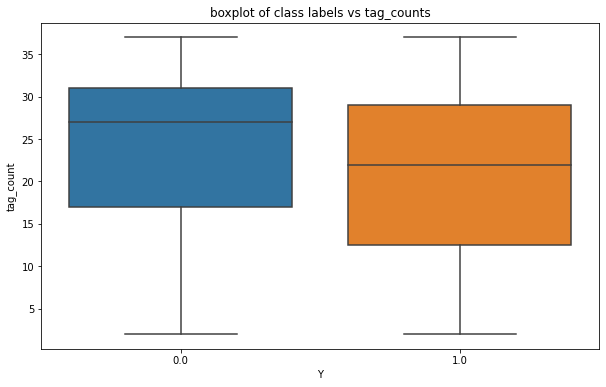

In [867]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Y", y="tag_count", data=pav_bhaji1)
plt.title("boxplot of class labels vs tag_counts")
plt.show()

## Observations:
### median for tag counts for pav_bhaji images is approximately 22
### median for tag counts for non pav_bhaji images is approximately 27

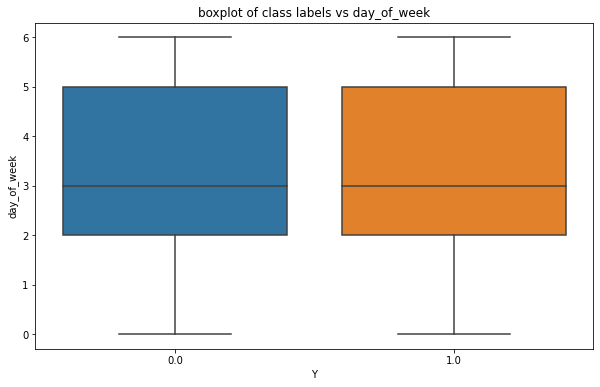

In [868]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Y", y="day_of_week", data=pav_bhaji1)
plt.title("boxplot of class labels vs day_of_week")
plt.show()

## observations:
### more than 75% of pav_bhaji and non pav_images were posted on weekend
### images of weekend have more chances of being classified

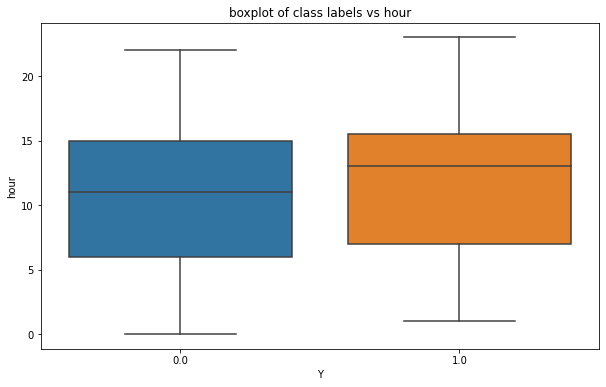

In [869]:


import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Y", y="hour", data=pav_bhaji1)
plt.title("boxplot of class labels vs hour")
plt.show()

### most of the images are posted between morning and evening approximately between 7am to 5pm
### median hour for both type of images are 11 and 14
### extreme values in pav bhaji images suggest people take pav bhaji late evening also and posted images 

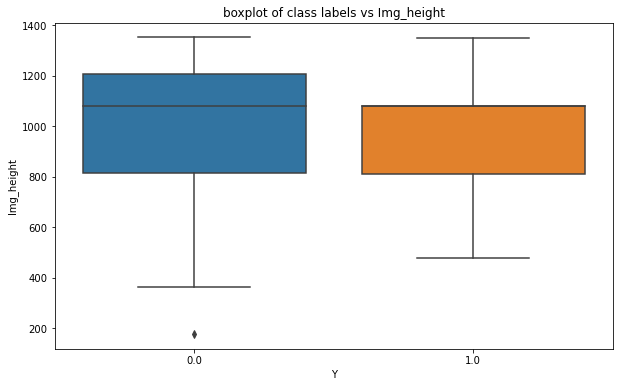

In [870]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Y", y="Img_height", data=pav_bhaji1)
plt.title("boxplot of class labels vs Img_height")
plt.show()

### non pav bhaji images height have more median as compared to pav bhaji images

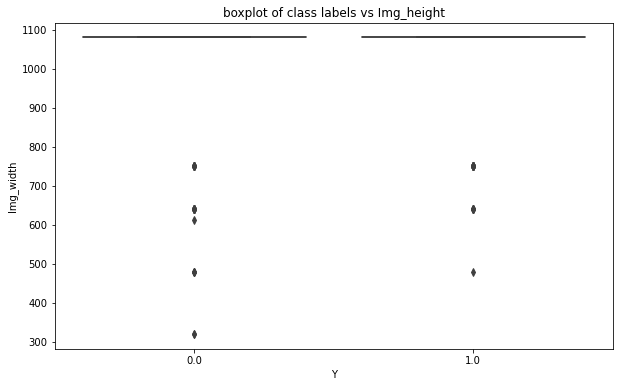

In [871]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Y", y="Img_width", data=pav_bhaji1)
plt.title("boxplot of class labels vs Img_height")
plt.show()

In [872]:
# no valuable pattern is noted

In [873]:
pav_bhaji1[pav_bhaji1.Y==1].location.value_counts() #location count of pav_bhaji images

unknown                       76
delhi, india                   3
pune, maharashtra              3
amar juice center              2
chandigarh, india              2
                              ..
mumbai, maharashtra            1
filhal to ghar hu              1
amrut sagar restaurant         1
shiv sagar by the rs group     1
chaayos                        1
Name: location, Length: 94, dtype: int64

In [874]:
pav_bhaji1[pav_bhaji1.Y==0].location.value_counts()  #location count of non_pav bhaji images

unknown                       103
chandigarh, india               6
yummy bites cbe                 6
bha vadilal happinezz           5
connaught place - cp,delhi      4
                             ... 
pune, maharashtra               1
boonsboro, virginia             1
shiv tikki wala                 1
barbeque nation                 1
chaayos                         1
Name: location, Length: 130, dtype: int64

Text(0.5, 1.0, 'non_pav_bhaji_image_loc')

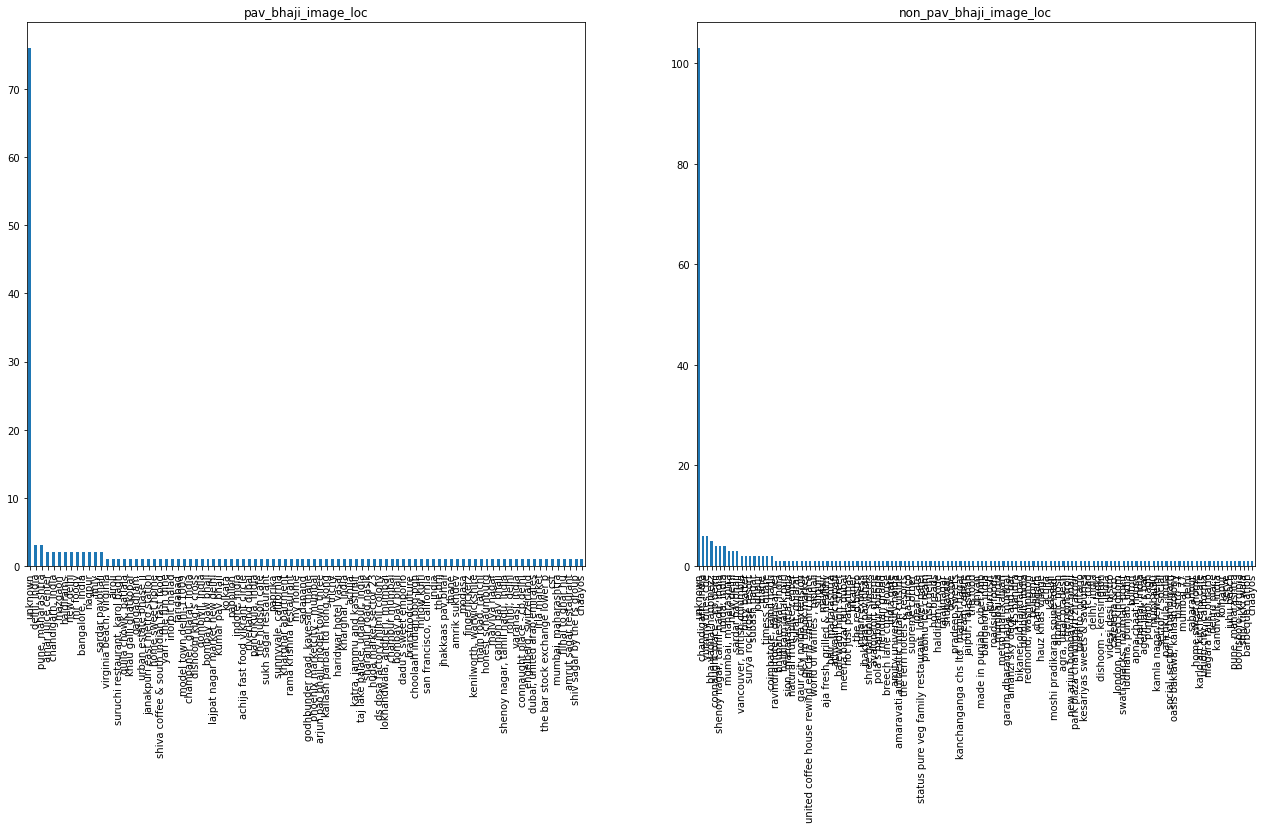

In [875]:
f,ax = plt.subplots(1,2,figsize=(22,10))
pav_bhaji1[pav_bhaji1.Y==1].location.value_counts().plot.bar(ax=ax[0])
pav_bhaji1[pav_bhaji1.Y==0].location.value_counts().plot.bar(ax=ax[1])

ax[0].set_title('pav_bhaji_image_loc')
ax[1].set_title('non_pav_bhaji_image_loc')


### pav bhaji locations are almost uniform (as pav bhaji locations will be same)
### non pav bhaji locations are skewed

Text(0.5, 1.0, 'non_pav_bhaji_image_loc')

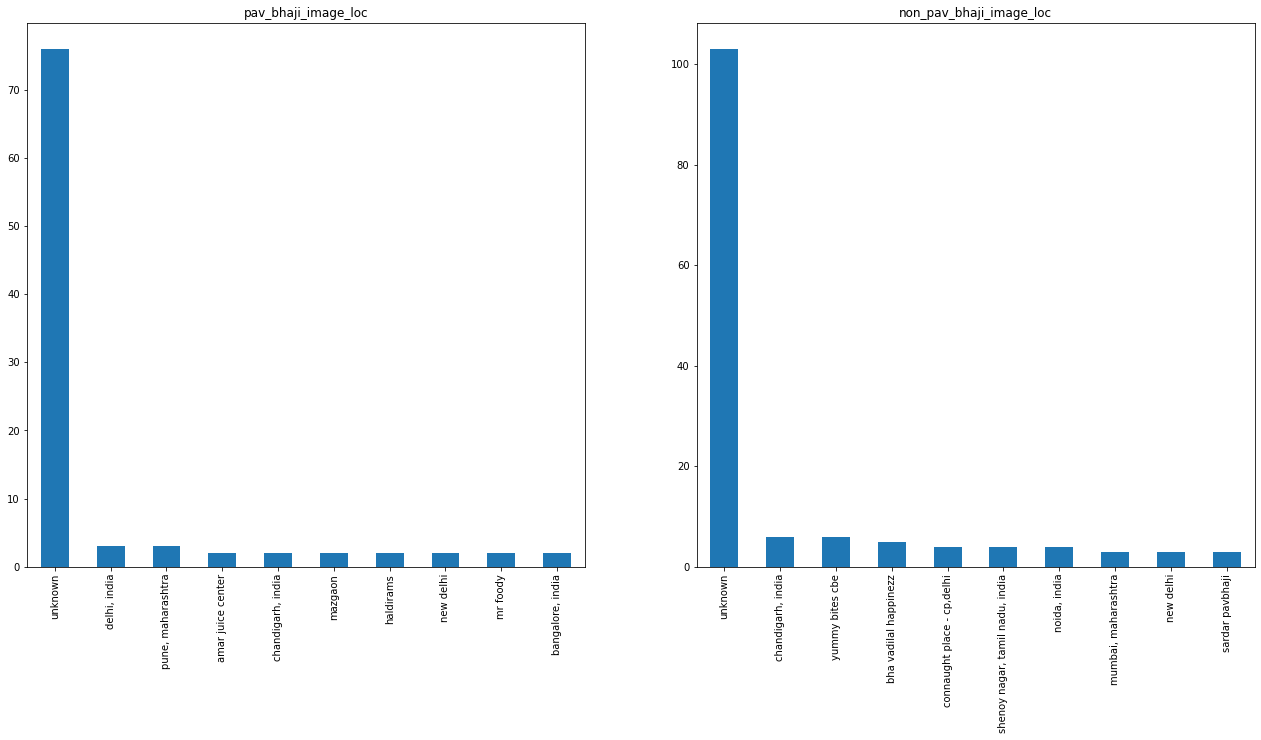

In [876]:
#plotting top 10 locations
f,ax = plt.subplots(1,2,figsize=(22,10))
pav_bhaji1[pav_bhaji1.Y==1].location.value_counts().head(10).plot.bar(ax=ax[0])
pav_bhaji1[pav_bhaji1.Y==0].location.value_counts().head(10).plot.bar(ax=ax[1])

ax[0].set_title('pav_bhaji_image_loc')
ax[1].set_title('non_pav_bhaji_image_loc')


### these top 10 locations can be helpful in classifying the pav_bhaji images

In [877]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\91769\anaconda3\lib\site-packages (2.10.0)


In [878]:
#import pandas_profiling 
#profile=pav_bhaji1.profile_report(title="Pav_bhaji's Profiling after Data Preprocessing")
#profile.to_file(output_file="pav_bhaji_profiling_after_preprocessing.html")

### <p style='font-size:18px'><b> Observations of  pandas_profiling: </b></p>
#### 1.is_video has constant value so need to drop the column</b>
#### 2.edge_media_preview_like is highly correlated with edge_liked_by
#### 3.edge_liked_by is highly correlated with edge_media_preview_like
#### 4.day_of_week has 46 (10.2%) zeros i.e this much percent of people posted image on monday
#### 5.hour has 5 (1.1%) zeros i.e very few people posted image at 12 am
#### 6.hour histogram is in normal distribution shape


In [879]:
pav_bhaji1.columns

Index(['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
       'is_video', 'location', 'tags', 'Img_height', 'Img_width', 'CleanText',
       'tag_count', 'location_prob', 'img_id', 'day_of_week', 'hour', 'Y'],
      dtype='object')

In [880]:
pav_bhaji2=pav_bhaji1[['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
         'tags', 'Img_height', 'Img_width', 'CleanText',
       'tag_count', 'location_prob',  'day_of_week', 'hour', 'Y']]   #removing some of the columns

In [881]:
#applying one hot encoding  on day_of_week and replacing hour values with thier counts
pav_bhaji2=pd.get_dummies(pav_bhaji2, columns=['day_of_week'],drop_first=True)

In [882]:
pav_bhaji2.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  \
17             45                       45                      5   
18            215                      215                      0   
19             46                       46                      0   
20            741                      741                      2   
21             28                       28                      0   

                                                 tags  Img_height  Img_width  \
17   westbengal iphone delhifoodie sokolkata mumba...        1155       1080   
18   foodgram foodphotography foodblogger foodmani...        1080       1080   
19   foodphotography bhaji pasta fries f grams ind...        1350       1080   
20   upcyclingfood twist leftoverpavbhajibreadpako...         750        750   
21   foodphotography lonidosa tbt foodie maharasht...         565       1080   

                                            CleanText  tag_count  \
17   edges node text chicken tikka n n n nfollow d...         31   
18   edges node text hello frandz npav bhaji khaal...         32   
19   edges node text follow dilliciousfoodie n dil...         31   
20   edges node text we ve got delicious evening s...         25   
21   edges node text people love food best n n n n...         32   

    location_prob  hour    Y  day_of_week_1  day_of_week_2  day_of_week_3  \
17       0.383946    14  0.0              0              0              0   
18       0.013378    14  1.0              0              0              0   
19       0.000669    13  0.0              0              0              0   
20       0.383946    13  0.0              0              0              0   
21       0.001338    13  0.0              0              0              0   

    day_of_week_4  day_of_week_5  day_of_week_6  
17              0              0              0  
18              0              0              0  
19              0              0              0  
20              0              0              0  
21              0              0              0

In [883]:
# replacing hour values with their counts
a=pav_bhaji2.hour.value_counts()
map1=a.to_dict()
pav_bhaji2['hour']=pav_bhaji2['hour'].map(map1)
pav_bhaji2.head(5)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  \
17             45                       45                      5   
18            215                      215                      0   
19             46                       46                      0   
20            741                      741                      2   
21             28                       28                      0   

                                                 tags  Img_height  Img_width  \
17   westbengal iphone delhifoodie sokolkata mumba...        1155       1080   
18   foodgram foodphotography foodblogger foodmani...        1080       1080   
19   foodphotography bhaji pasta fries f grams ind...        1350       1080   
20   upcyclingfood twist leftoverpavbhajibreadpako...         750        750   
21   foodphotography lonidosa tbt foodie maharasht...         565       1080   

                                            CleanText  tag_count  \
17   edges node text chicken tikka n n n nfollow d...         31   
18   edges node text hello frandz npav bhaji khaal...         32   
19   edges node text follow dilliciousfoodie n dil...         31   
20   edges node text we ve got delicious evening s...         25   
21   edges node text people love food best n n n n...         32   

    location_prob  hour    Y  day_of_week_1  day_of_week_2  day_of_week_3  \
17       0.383946    40  0.0              0              0              0   
18       0.013378    40  1.0              0              0              0   
19       0.000669    33  0.0              0              0              0   
20       0.383946    33  0.0              0              0              0   
21       0.001338    33  0.0              0              0              0   

    day_of_week_4  day_of_week_5  day_of_week_6  
17              0              0              0  
18              0              0              0  
19              0              0              0  
20              0              0              0  
21              0              0              0

### we will use desicion trees for finding important features for classification

In [884]:
# selecting only numerical features for desicion tree
X=pav_bhaji2[['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
        'Img_height', 'Img_width',  'tag_count',
       'location_prob', 'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6', 'hour']]
y=pav_bhaji2.Y

In [885]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(361, 14)
(361,)
(91, 14)
(91,)


In [886]:
# using sklearn for using decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
dtree.fit(X_train,y_train)  #fitting data


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10,
                       min_samples_leaf=4, min_samples_split=5)

In [887]:
# checking important features
importance=dtree.feature_importances_
importance

array([0.28767237, 0.2007377 , 0.21425813, 0.        , 0.        ,
       0.2973318 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [888]:
columns=[['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
        'Img_height', 'Img_width',  'tag_count',
       'location_prob', 'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6', 'hour']]


# Conclusion:
###  On the basis of information gain of decision tree the'edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment' and 'tag_count' are most important numerical features for classification


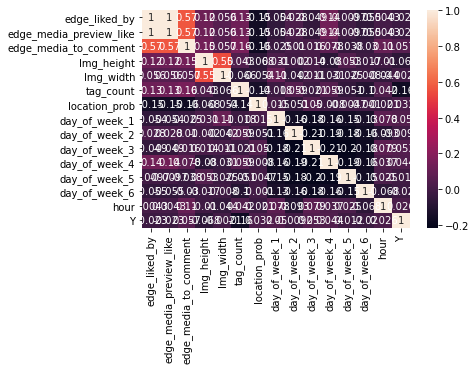

In [889]:
# checking for correlation
df=pav_bhaji2[['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
        'Img_height', 'Img_width',  'tag_count',
       'location_prob', 'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6', 'hour','Y']]
df1=sns.heatmap( df.corr(), annot=True )

### As 'edge_liked_by', 'edge_media_preview_like' are highly correlated we can delete one of them

### we will try to delete feature with the help of variation inflation factor

In [890]:
df2=df.corr().abs()
s = df2.unstack()
sort = s.sort_values(kind="quicksort")
sort

location_prob            day_of_week_6              0.001037
day_of_week_6            location_prob              0.001037
Img_height               day_of_week_2              0.001956
day_of_week_2            Img_height                 0.001956
Img_width                Y                          0.002111
                                                      ...   
edge_media_preview_like  edge_media_preview_like    1.000000
                         edge_liked_by              1.000000
edge_liked_by            edge_media_preview_like    1.000000
hour                     hour                       1.000000
Y                        Y                          1.000000
Length: 225, dtype: float64

In [891]:
sort.size

225

In [892]:
X=df.loc[:,df.columns!='Y']
Y=df.Y
names=X.columns
names

Index(['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
       'Img_height', 'Img_width', 'tag_count', 'location_prob',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'hour'],
      dtype='object')

In [893]:
# finding vif score by making independent variables as target variable
import statsmodels.api as sm
for i in range(0,len(names)):
    y=X.loc[:,X.columns==names[i]]
    x=X.loc[:,X.columns!=names[i]]
    model=sm.OLS(y,x)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print('variation inflation index of ',names[i], ' is ',vif)
   

variation inflation index of  edge_liked_by  is  inf
variation inflation index of  edge_media_preview_like  is  inf
variation inflation index of  edge_media_to_comment  is  1.84
variation inflation index of  Img_height  is  29.99
variation inflation index of  Img_width  is  42.71
variation inflation index of  tag_count  is  5.98
variation inflation index of  location_prob  is  1.72
variation inflation index of  day_of_week_1  is  2.14
variation inflation index of  day_of_week_2  is  2.34
variation inflation index of  day_of_week_3  is  2.72
variation inflation index of  day_of_week_4  is  2.5
variation inflation index of  day_of_week_5  is  2.35
variation inflation index of  day_of_week_6  is  2.01
variation inflation index of  hour  is  8.37


<ipython-input-893-b9f107a5d53c>:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif=round(1/(1-rsq),2)


### we can delete variables with vif value more than 5, but highly correlated varible both have infinite value, so we can delete any one of them

In [894]:
#standard scaling on numerical features
df=pav_bhaji2[['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
        'Img_height', 'Img_width',  'tag_count',
       'location_prob', 'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6', 'hour']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df)
df = scaler.transform(df)
df=pd.DataFrame(df)


In [895]:
pav_bhaji2.reset_index(inplace = True)

In [896]:
df['Y']=pav_bhaji2['Y']

In [897]:
df['Y']

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
447    1.0
448    1.0
449    1.0
450    0.0
451    0.0
Name: Y, Length: 452, dtype: float64

### finding outliers using LOF on numerical features

In [898]:

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
a=clf.fit_predict(df)
a.shape

(452,)

In [899]:
index=[]
for i in range(0,452):
    if a[i]==-1:
        index.append(i)
        
print(index)

[1, 83, 91, 126, 148, 157, 166, 183, 194, 199, 229, 250, 267, 278, 279, 316, 320, 322, 325, 354, 383, 384, 415, 424, 442]


In [900]:
len(index)  #according LOF there are 12 outliers

25

In [901]:
#As data is less so we are not deleting the outliers

In [902]:
#Creating text vectors using text features tags,CleanText

In [903]:
#we will create text vectors using BOW and tfidf

# Featurization using CleanText column

## BAG OF WORDS,TFIDF & BI GRAM

In [904]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pav_bhaji2['CleanText'], pav_bhaji2['Y'], test_size=0.25, random_state=42, shuffle=True, stratify=pav_bhaji2['Y'])
print("Dataset Splitted ... \nTrain Set Size = {}\nTest Set Size  = {}".format(X_train.shape[0], X_test.shape[0]))

Dataset Splitted ... 
Train Set Size = 339
Test Set Size  = 113


In [905]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aadiivaasii', 'aaj', 'aam', 'aaojikhhaoji', 'aapka', 'aapko', 'aasam', 'aata', 'aaya', 'abroad']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (339, 3823)
the number of unique words  3823


In [906]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((339, 3823), (113, 3823))

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


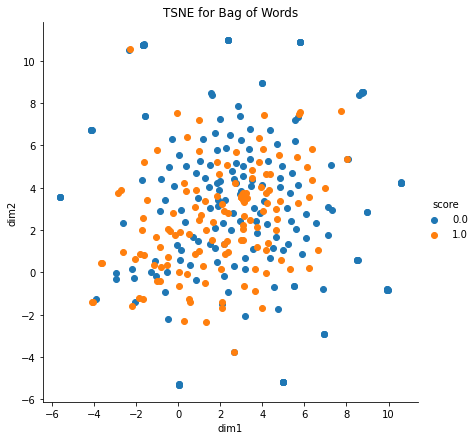

In [907]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


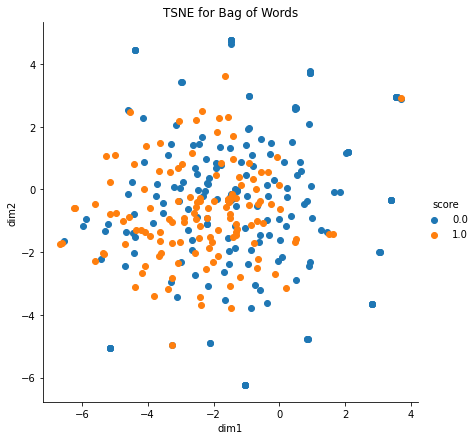

In [908]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 6000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


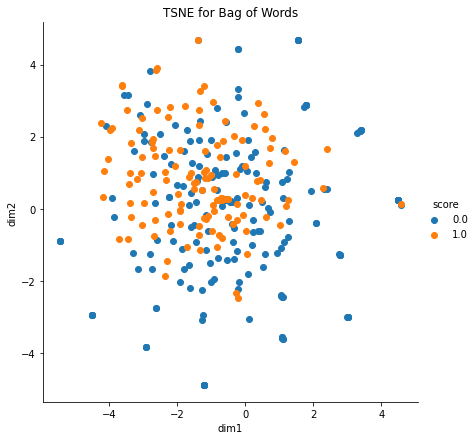

In [909]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 60, n_iter = 4000,learning_rate=300)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

# observation of BOW
### We have used various combination of parameters of TSNE to visualze the data
### vectors using BOW are not able to form any good pattern which classifies the images on cleaned text

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


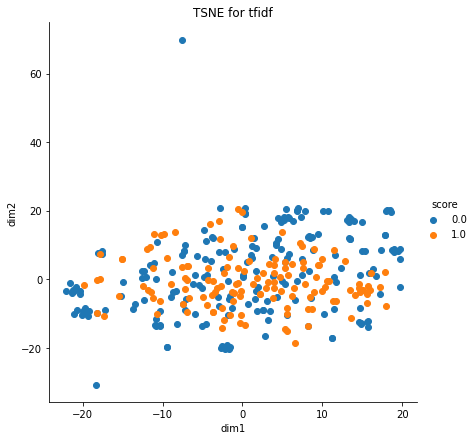

In [910]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


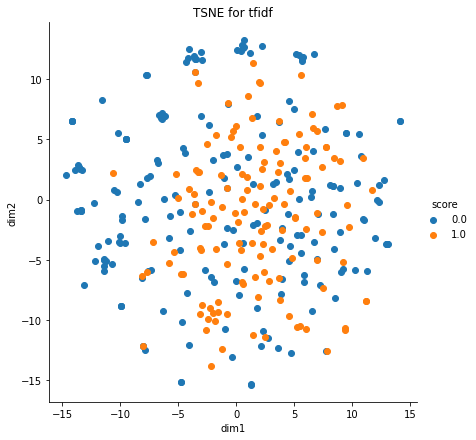

In [911]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 6000,learning_rate=300)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


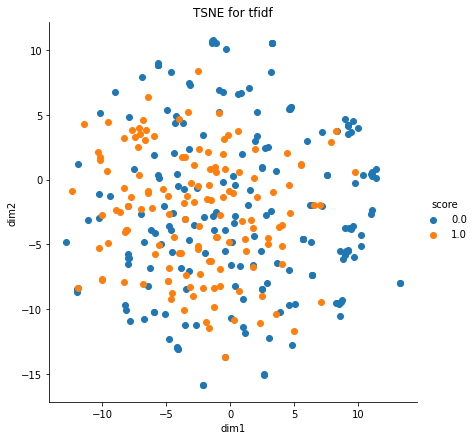

In [912]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 60, n_iter = 7000,learning_rate=400)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

# observation of BOW
### We have used various combination of parameters of TSNE to visualze the data
### vectors using TFIDF are looking bit better than BOW to  classifies the images on cleaned text

In [913]:
count_vect = CountVectorizer(ngram_range=(1,2) ) #bi gram

count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text Bigram vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aadiivaasii', 'aadiivaasii grams', 'aaj', 'aaj nagpur', 'aam', 'aam ka', 'aaojikhhaoji', 'aaojikhhaoji ntag', 'aapka', 'aapka bhi']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text Bigram vectorizer  (339, 13404)
the number of unique words  13404


C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


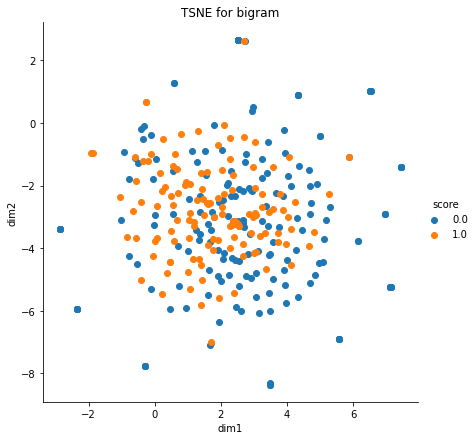

In [914]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 40, n_iter = 7000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for bigram")
plt.show()

# Featurization using tags column

## BAG OF WORDS,TFIDF & BIGRAM

In [915]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pav_bhaji2['tags'], pav_bhaji2['Y'], test_size=0.25, random_state=42, shuffle=True, stratify=pav_bhaji2['Y'])
print("Dataset Splitted ... \nTrain Set Size = {}\nTest Set Size  = {}".format(X_train.shape[0], X_test.shape[0]))

Dataset Splitted ... 
Train Set Size = 339
Test Set Size  = 113


In [916]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aadiivaasii', 'aasam', 'absolutefoodies', 'abstractartist', 'abstracteverything', 'abstractillustration', 'abstractlife', 'abthefoodie', 'achchedin', 'achija']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (339, 2099)
the number of unique words  2099


In [917]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((339, 2099), (113, 2099))

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


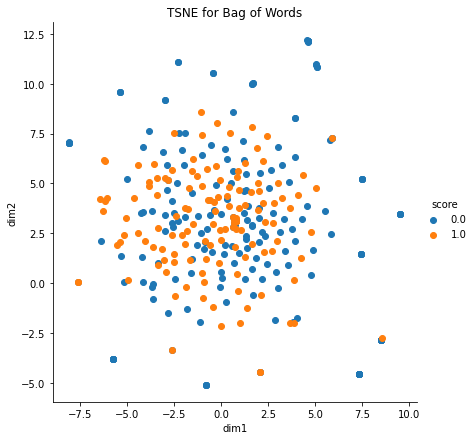

In [918]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


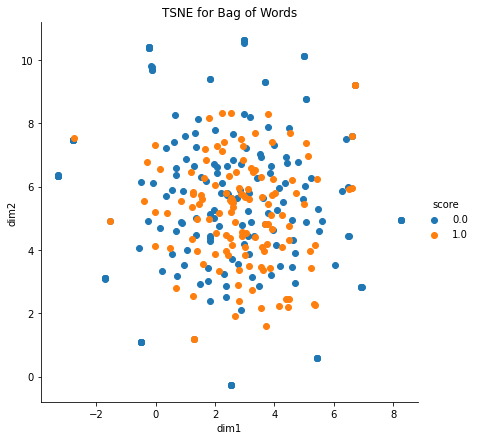

In [919]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


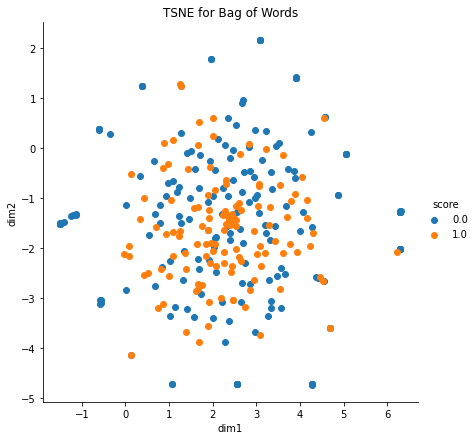

In [920]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 90, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

# observation of BOW
### We have used various combination of parameters of TSNE to visualze the data
### vectors using tags are looking better than cleaned text in visualization

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


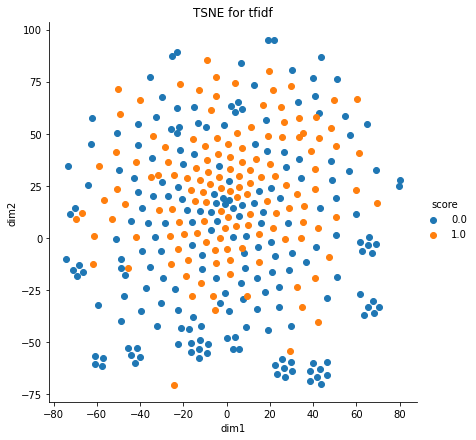

In [921]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


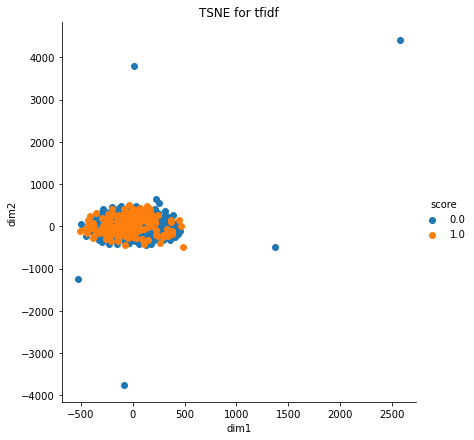

In [922]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


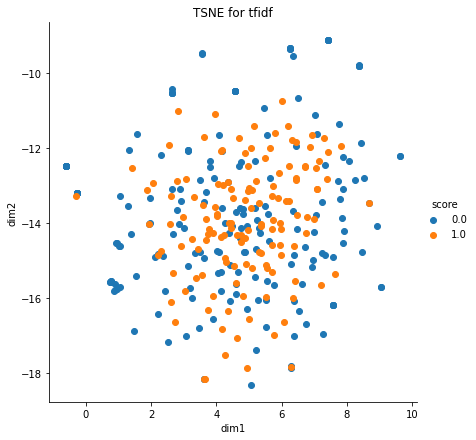

In [923]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 40, n_iter = 7000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = X_train_tf.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for tfidf")
plt.show()

# observation of TFIDF
### We have used various combination of parameters of TSNE to visualze the data
### vectors using TFIDF on tags column are so far best for classification as some pattern has been observed

In [924]:
count_vect = CountVectorizer(ngram_range=(1,2) ) #bi gram

count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(X_train)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text Bigram vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

some feature names  ['aadiivaasii', 'aadiivaasii classic', 'aasam', 'aasam chandigarh', 'absolutefoodies', 'absolutefoodies utterlybutterlydelicious', 'abstractartist', 'abstractartist mumbaistreetfoodlovers', 'abstracteverything', 'abstracteverything abstractillustration']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text Bigram vectorizer  (339, 6648)
the number of unique words  6648


C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


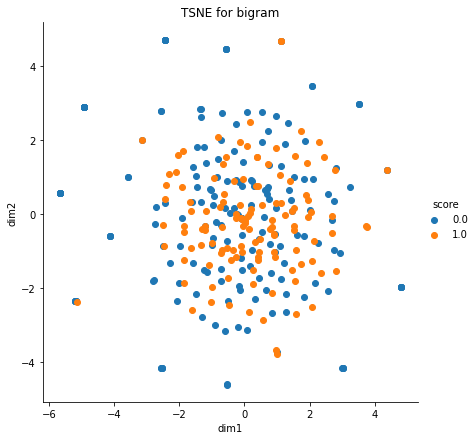

In [925]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 40, n_iter = 7000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for bigram")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


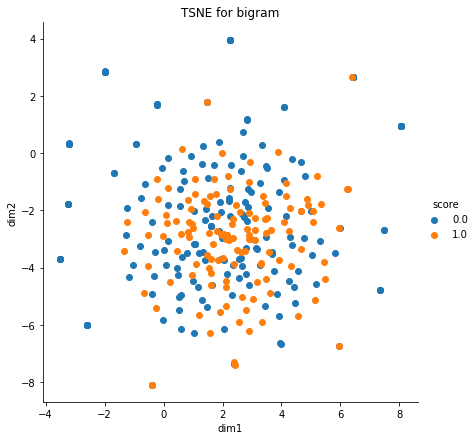

In [926]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for bigram")
plt.show()

C:\Users\91769\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


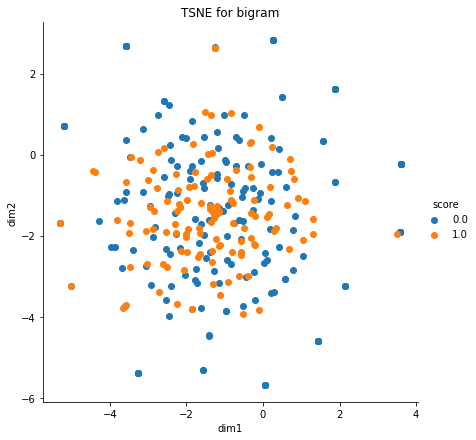

In [927]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
std_data = final_counts.todense()
tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for bigram")
plt.show()

# observation of Bigram
### We have used various combination of parameters of TSNE to visualze the data
### vectors using tags are looking better than on cleaned text using bigram

# Conclusion:
### vectors created using TFIDF on tags column are looking promising for classifcation of images

<h3>  File size  of selected png files as a feature for classification</h3>

In [928]:
#calculating size of images label as 0
files=os.listdir(r'C:\Users\91769\Desktop\challenge\dataset\images\0')

filenames=pav_bhaji1['img_id'].tolist()
class_y=pav_bhaji1['Y'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    statinfo=os.stat(r'C:/Users/91769/Desktop/challenge/dataset/images/0/'+ file)
    
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte_0=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})

data_size_byte_0.ID= data_size_byte_0.ID+'.txt'
print (data_size_byte_0.head())

                                                  ID      size  Class
0  24274012_2042365482666908_6941195371183865856_...  0.084750    0.0
1  25007049_1999304547019423_8482995541326692352_...  0.157906    0.0
2  34372850_1661761887275993_1422925813375827968_...  0.057285    0.0
3  37154984_698533917170250_799715454451974144_n....  0.135945    0.0
4  37158549_528309647598249_6068909533663592448_n...  0.051755    0.0


In [929]:
#calculating size of images label as 1
files=os.listdir(r'C:\Users\91769\Desktop\challenge\dataset\images\1')

filenames=pav_bhaji1['img_id'].tolist()
class_y=pav_bhaji1['Y'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    statinfo=os.stat(r'C:/Users/91769/Desktop/challenge/dataset/images/1/'+ file)
    
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte_1=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})

data_size_byte_1.ID= data_size_byte_1.ID+'.txt'
print (data_size_byte_1.head())

                                                  ID      size  Class
0  16228666_180901469054785_6854217108004274176_n...  0.141308    1.0
1  20590186_1136380956463100_8896999366112313344_...  0.051140    1.0
2  34874678_217155915753039_6705436451573596160_n...  0.103192    1.0
3  36830663_718820048315034_5442150758659129344_n...  0.063278    1.0
4  37152670_241141713125413_5929465483299389440_n...  0.184703    1.0


In [930]:
# merging the dataframe
size_data=data_size_byte_1.append(data_size_byte_0)
size_data

ID      size  Class
0    16228666_180901469054785_6854217108004274176_n...  0.141308    1.0
1    20590186_1136380956463100_8896999366112313344_...  0.051140    1.0
2    34874678_217155915753039_6705436451573596160_n...  0.103192    1.0
3    36830663_718820048315034_5442150758659129344_n...  0.063278    1.0
4    37152670_241141713125413_5929465483299389440_n...  0.184703    1.0
..                                                 ...       ...    ...
264  39992125_538895866564785_6895245392984670208_n...  0.165833    0.0
265  40092154_2171536229838011_4987697065023766528_...  0.364707    0.0
266  40104017_739359253122887_4805401799529857024_n...  0.059570    0.0
267  40213194_2204069856494384_5825975570537644032_...  0.123203    0.0
268  40246495_532997897114064_2276439319507894272_n...  0.094069    0.0

[452 rows x 3 columns]

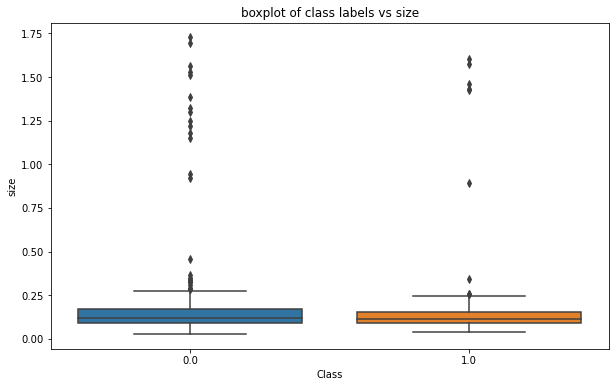

In [931]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Class", y="size", data=size_data)
plt.title("boxplot of class labels vs size")
plt.show()

# observation
### 1.non pav_bhaji images size has more extreme values as compared to pav_bhaji images
### 2.size of images can also be helpful in classification
### 3.allmost all pav bhaji images size is less than 0.25 mb

# As vectors using 'tags' were better in visulization than 'cleaned text' lets have some analysis on tags column

In [932]:
#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())

tag_dtm = vectorizer.fit_transform(pav_bhaji2['tags'])

In [933]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 452
Number of unique tags : 2587


In [934]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tages we have :", tags[:10])

Some of the tages we have : ['aadiivaasii', 'aasam', 'absolutefoodies', 'abstractartist', 'abstracteverything', 'abstractillustration', 'abstractlife', 'abthefoodie', 'achchedin', 'achija']


In [935]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [936]:
#Saving this dictionary to csv files.
import csv
if not os.path.isfile(r'C:\Users\91769\Desktop\challenge\dataset\images\tag_counts_dict_dtm.csv'):
    with open('tag_counts_dict_dtm.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
tag_df = pd.read_csv("tag_counts_dict_dtm.csv", names=['Tags', 'Counts'])
tag_df.head()

Tags  Counts
0         aadiivaasii       1
1               aasam       1
2     absolutefoodies       1
3      abstractartist       1
4  abstracteverything       1

In [937]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values
tag_counts

array([445, 153, 147, ...,   1,   1,   1], dtype=int64)

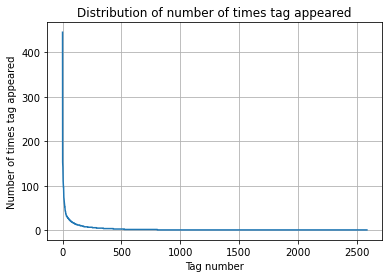

In [938]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [939]:
!pip install wordcloud

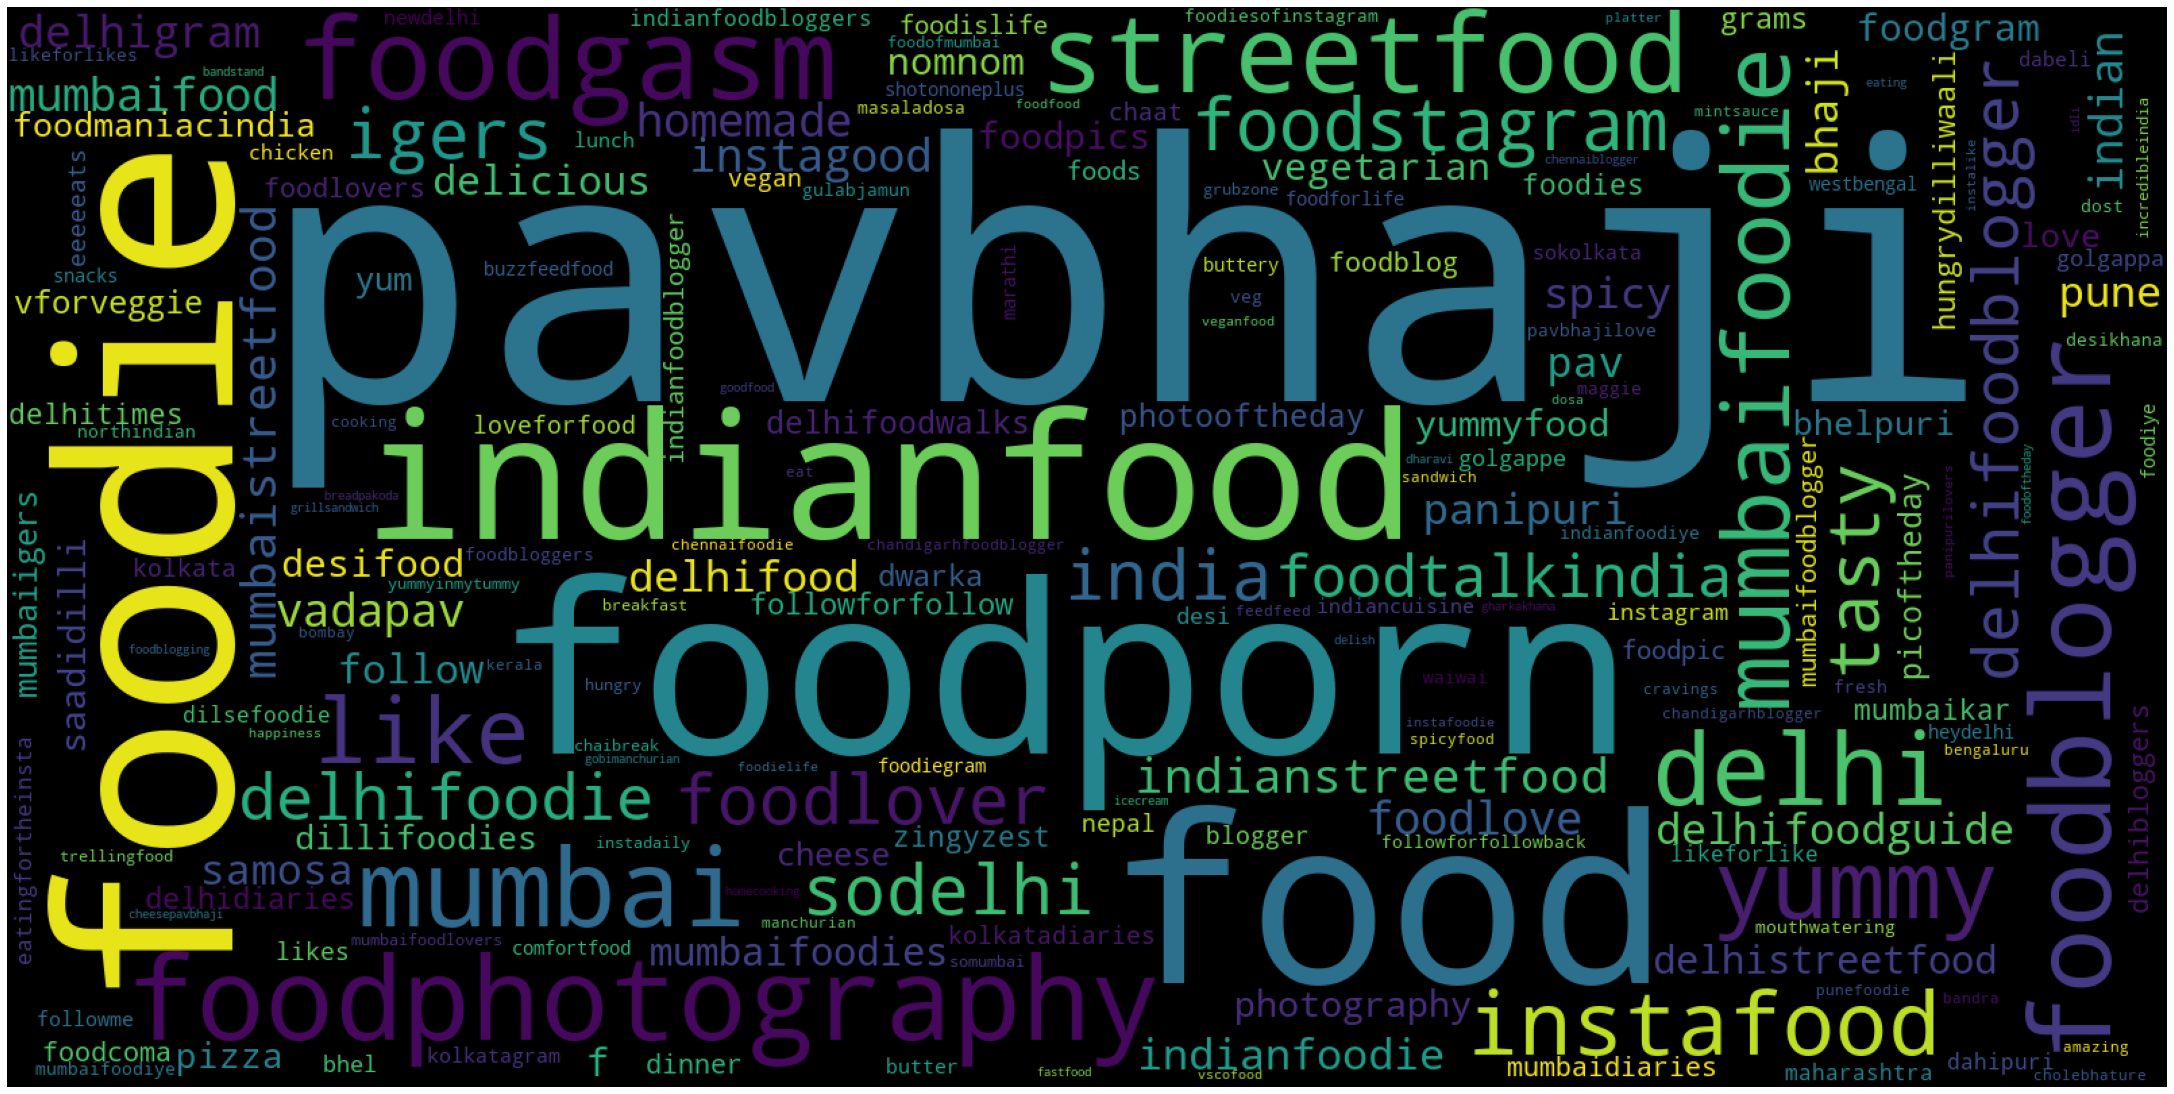

In [940]:
# ploting higher frequency words in larger size
from wordcloud import WordCloud
# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

# Observations:
### These larger words can play significant role in classification of images

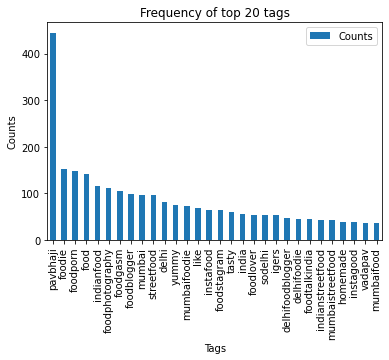

In [941]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

# These are the top 20 words

# Model based on tfidf on tag column

In [942]:
tfidf_vectoriser = TfidfVectorizer()
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((339, 2099), (113, 2099))

In [943]:
import random
print("Ten Random Words from Training Set ...\n",*random.sample(tfidf_vectoriser.get_feature_names(),10))

Ten Random Words from Training Set ...
 samosas journeystarts bombaystyle foodblogfeed kingscross hemaskitchn empty chefreena ludhiana midnight


In [944]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


In [945]:
columns=['edge_liked_by', 'edge_media_preview_like', 'edge_media_to_comment',
        'Img_height', 'Img_width',  'tag_count',
       'location_prob', 'day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5','day_of_week_6', 'hour','Y']
df.columns=columns

In [946]:
df.head(10)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  Img_height  \
0      -0.254367                -0.254367               0.004617    0.570748   
1      -0.034410                -0.034410              -0.430130    0.249842   
2      -0.253073                -0.253073              -0.430130    1.405101   
3       0.646160                 0.646160              -0.256232   -1.162141   
4      -0.276362                -0.276362              -0.430130   -1.953708   
5       0.587937                 0.587937              -0.082333   -1.162141   
6       0.087212                 0.087212               0.178516    1.037130   
7      -0.139213                -0.139213              -0.256232   -0.905417   
8       0.725086                 0.725086               0.700212   -0.905417   
9       1.584209                 1.584209               0.352415    0.249842   

   Img_width  tag_count  location_prob  day_of_week_1  day_of_week_2  \
0   0.343554   0.897598       1.234821      -0.364461      -0.431685   
1   0.343554   1.000493      -0.753380      -0.364461      -0.431685   
2   0.343554   0.897598      -0.821568      -0.364461      -0.431685   
3  -2.078440   0.280229       1.234821      -0.364461      -0.431685   
4   0.343554   1.000493      -0.817979      -0.364461      -0.431685   
5  -2.078440   0.280229       1.234821      -0.364461      -0.431685   
6   0.343554   0.383124      -0.810801      -0.364461      -0.431685   
7   0.343554   0.794704      -0.821568      -0.364461      -0.431685   
8   0.343554   1.514968      -0.803624      -0.364461      -0.431685   
9   0.343554   1.103388      -0.821568      -0.364461      -0.431685   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6      hour    Y  
0      -0.481256      -0.446026      -0.424449      -0.364461  1.595726  0.0  
1      -0.481256      -0.446026      -0.424449      -0.364461  1.595726  1.0  
2      -0.481256      -0.446026      -0.424449      -0.364461  0.825845  0.0  
3      -0.481256      -0.446026      -0.424449      -0.364461  0.825845  0.0  
4      -0.481256      -0.446026      -0.424449      -0.364461  0.825845  0.0  
5      -0.481256      -0.446026      -0.424449      -0.364461 -0.823899  0.0  
6      -0.481256      -0.446026      -0.424449      -0.364461 -0.823899  1.0  
7      -0.481256      -0.446026      -0.424449      -0.364461 -0.823899  1.0  
8      -0.481256      -0.446026      -0.424449      -0.364461 -0.823899  1.0  
9      -0.481256      -0.446026      -0.424449      -0.364461 -0.823899  0.0

In [947]:
df.drop(['edge_media_preview_like'],inplace=True,axis=1)

In [948]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pav_bhaji2['tags'], pav_bhaji2['Y'], test_size=0.25, random_state=42, shuffle=True, stratify=pav_bhaji2['Y'])
print("Dataset Splitted ... \nTrain Set Size = {}\nTest Set Size  = {}".format(X_train.shape[0], X_test.shape[0]))

Dataset Splitted ... 
Train Set Size = 339
Test Set Size  = 113


In [949]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()

In [950]:
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((339, 2099), (113, 2099))

In [951]:
!pip3 install xgboost
from xgboost import XGBClassifier

In [952]:

models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0),
    XGBClassifier(n_estimators=50,nthread=-1)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf ,y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [953]:
cv_df

model_name  fold_idx  accuracy
0                LinearSVC         0  0.691176
1                LinearSVC         1  0.617647
2                LinearSVC         2  0.588235
3                LinearSVC         3  0.617647
4                LinearSVC         4  0.552239
5            MultinomialNB         0  0.632353
6            MultinomialNB         1  0.661765
7            MultinomialNB         2  0.573529
8            MultinomialNB         3  0.573529
9            MultinomialNB         4  0.552239
10      LogisticRegression         0  0.632353
11      LogisticRegression         1  0.573529
12      LogisticRegression         2  0.617647
13      LogisticRegression         3  0.617647
14      LogisticRegression         4  0.582090
15  RandomForestClassifier         0  0.632353
16  RandomForestClassifier         1  0.661765
17  RandomForestClassifier         2  0.676471
18  RandomForestClassifier         3  0.705882
19  RandomForestClassifier         4  0.552239
20           XGBClassifier         0  0.588235
21           XGBClassifier         1  0.691176
22           XGBClassifier         2  0.632353
23           XGBClassifier         3  0.647059
24           XGBClassifier         4  0.567164

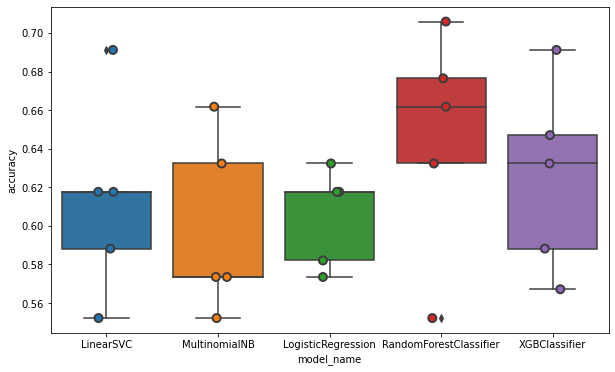

In [954]:
plt.figure(figsize=(10,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [955]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[10,50,100,500,1000,2000,3000]
}
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_tf, y_train)
print("Best Parameters :",rf_cv.best_params_)
print("Best Score :",rf_cv.best_score_)

Best Parameters : {'n_estimators': 10}
Best Score : 0.6841527655838455


In [956]:
rf = RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [957]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = rf.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("Accuracy :",accuracy_score(y_test, y_pred), end='\n\n')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

    Negative       0.69      0.61      0.65        67
    Positive       0.52      0.61      0.56        46

    accuracy                           0.61       113
   macro avg       0.61      0.61      0.61       113
weighted avg       0.62      0.61      0.61       113

Accuracy : 0.6106194690265486

[[41 26]
 [18 28]]


In [958]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0,1.5]
}
svm = LinearSVC(max_iter=1500)
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_tf, y_train)
print("Best Parameters :", svm_cv.best_params_)
print("Best Score :",svm_cv.best_score_)

Best Parameters : {'C': 1.5}
Best Score : 0.6192712906057946


# RANDOM FOREST IS GIVING VERY LESS ACCURACY WITH THE TEXT COLUMN THAT IS 'TAG COLUMN' ONLY 61%

In [959]:
pav_bhaji1.head(2)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
17             45                       45                      5         0   
18            215                      215                      0         0   

     location                                               tags  Img_height  \
17    unknown   westbengal iphone delhifoodie sokolkata mumba...        1155   
18  new delhi   foodgram foodphotography foodblogger foodmani...        1080   

    Img_width                                          CleanText  tag_count  \
17       1080   edges node text chicken tikka n n n nfollow d...         31   
18       1080   edges node text hello frandz npav bhaji khaal...         32   

    location_prob                                             img_id  \
17       0.383946  39790065_708138802879611_4373499256883904512_n...   
18       0.013378  39205669_548076665624561_2856530375738392576_n...   

    day_of_week  hour    Y  
17            0    14  0.0  
18            0    14  1.0

In [960]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pav_bhaji2['CleanText'], pav_bhaji2['Y'], test_size=0.25, random_state=42, shuffle=True, stratify=pav_bhaji2['Y'])
print("Dataset Splitted ... \nTrain Set Size = {}\nTest Set Size  = {}".format(X_train.shape[0], X_test.shape[0]))

Dataset Splitted ... 
Train Set Size = 339
Test Set Size  = 113


In [961]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectoriser = TfidfVectorizer()
tfidf_vectoriser.fit(X_train)
X_train_tf = tfidf_vectoriser.transform(X_train)
X_test_tf = tfidf_vectoriser.transform(X_test)
X_train_tf.shape, X_test_tf.shape

((339, 3823), (113, 3823))

In [962]:

models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0),
    XGBClassifier(n_estimators=50,nthread=-1)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf ,y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [963]:
cv_df

model_name  fold_idx  accuracy
0                LinearSVC         0  0.632353
1                LinearSVC         1  0.705882
2                LinearSVC         2  0.705882
3                LinearSVC         3  0.632353
4                LinearSVC         4  0.641791
5            MultinomialNB         0  0.617647
6            MultinomialNB         1  0.602941
7            MultinomialNB         2  0.617647
8            MultinomialNB         3  0.632353
9            MultinomialNB         4  0.626866
10      LogisticRegression         0  0.588235
11      LogisticRegression         1  0.602941
12      LogisticRegression         2  0.573529
13      LogisticRegression         3  0.602941
14      LogisticRegression         4  0.641791
15  RandomForestClassifier         0  0.647059
16  RandomForestClassifier         1  0.705882
17  RandomForestClassifier         2  0.676471
18  RandomForestClassifier         3  0.647059
19  RandomForestClassifier         4  0.626866
20           XGBClassifier         0  0.647059
21           XGBClassifier         1  0.750000
22           XGBClassifier         2  0.588235
23           XGBClassifier         3  0.617647
24           XGBClassifier         4  0.686567

In [964]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0,1.5]
}
svm = LinearSVC(max_iter=1500)
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_tf, y_train)
print("Best Parameters :", svm_cv.best_params_)
print("Best Score :",svm_cv.best_score_)

Best Parameters : {'C': 1.5}
Best Score : 0.6783582089552238


In [965]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = svm_cv.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("Accuracy :",accuracy_score(y_test, y_pred), end='\n\n')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

    Negative       0.76      0.61      0.68        67
    Positive       0.56      0.72      0.63        46

    accuracy                           0.65       113
   macro avg       0.66      0.66      0.65       113
weighted avg       0.68      0.65      0.66       113

Accuracy : 0.6548672566371682

[[41 26]
 [13 33]]


In [966]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[10,50,100,500,1000,2000,3000]
}
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_tf, y_train)
print("Best Parameters :",rf_cv.best_params_)
print("Best Score :",rf_cv.best_score_)

Best Parameters : {'n_estimators': 50}
Best Score : 0.6607111501316945


In [967]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
y_pred = svm_cv.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("Accuracy :",accuracy_score(y_test, y_pred), end='\n\n')
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

    Negative       0.76      0.61      0.68        67
    Positive       0.56      0.72      0.63        46

    accuracy                           0.65       113
   macro avg       0.66      0.66      0.65       113
weighted avg       0.68      0.65      0.66       113

Accuracy : 0.6548672566371682

[[41 26]
 [13 33]]


# RANDOM FOREST IS GIVING VERY LESS ACCURACY WITH THE TEXT COLUMN THAT IS 'clean text' ONLY 65%

In [969]:
pd=data_size_byte_0.append(data_size_byte_1)
pd.head(2)

ID      size  Class
0  24274012_2042365482666908_6941195371183865856_...  0.084750    0.0
1  25007049_1999304547019423_8482995541326692352_...  0.157906    0.0

In [975]:
pd.rename(columns = {'ID':'img_id'}, inplace = True)

In [976]:
pd.head(2)

img_id      size  Class
0  24274012_2042365482666908_6941195371183865856_...  0.084750    0.0
1  25007049_1999304547019423_8482995541326692352_...  0.157906    0.0

In [984]:
pav_bhaji1=pav_bhaji1.sort_values(by='img_id')
pav_bhaji1.head(2)

edge_liked_by  edge_media_preview_like  edge_media_to_comment  is_video  \
289             30                       30                      0         0   
431             10                       10                      1         0   

                location                     tags  Img_height  Img_width  \
289  yari - the fun dine        pavbhaji special          920       1080   
431              unknown   pavbhaji pavbhajilove          640        640   

                                   CleanText  tag_count  location_prob  \
289   edges node text yari special pavbhaji           4       0.000669   
431   edges node text pavbhaji pavbhajilove           4       0.383946   

                                                img_id  day_of_week  hour    Y  
289  16228666_180901469054785_6854217108004274176_n...            0    15  1.0  
431  20590186_1136380956463100_8896999366112313344_...            0     6  1.0

In [985]:
pd=pd.sort_values(by='img_id')
pd.head(2)

img_id      size  Class
0  16228666_180901469054785_6854217108004274176_n...  0.141308    1.0
1  20590186_1136380956463100_8896999366112313344_...  0.051140    1.0